In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import math

import seaborn
seaborn.set_context('talk')

##**Dataset news_dataset**

In [ ]:
#leer csv news_dataset
url_2 = 'https://drive.google.com/file/d/1pdPHu1f5VcQBpFpZEKoctXMw5E0pDcE-/view?usp=sharing'
file_id_2=url_2.split('/')[-2]
dwn_url_2='https://drive.google.com/uc?id=' + file_id_2
df_news = pd.read_csv(dwn_url_2)
df_news[:5]

id ticker                                              title category  \
0  405983     GS  Take Five  World markets themes for the week a...     news   
1  418151    MCD       Tuesday  July 23  Futures Higher On Earnings  opinion   
2  429819     MS  Morgan Stanley downgrades Trivago on increasin...     news   
3  227801    CHN               PBOC cuts banks  reserve requirement     news   
4  239421   MSFT        Microsoft nudges S P 500 toward record high     news   

                                             content release_date  \
0  LONDON  Reuters    Following are five big them...   2018-08-10   
1  Futures Higher On Earnings U S  equity futures...   2013-07-23   
2  Morgan Stanley   NYSE MS  downgrades Trivago  ...   2017-09-28   
3  Looking to shore up the economy amid a worseni...   2018-10-07   
4  By Noel Randewich\n Reuters    Microsoft and h...   2019-09-19   

        provider                                                url  \
0        Reuters  https://www.investing.com/news/economy-news/ta...   
1      Benzinga   https://www.investing.com/analysis/tuesday,-ju...   
2  Seeking Alpha  https://www.investing.com/news/stock-market-ne...   
3  Seeking Alpha  https://www.investing.com/news/stock-market-ne...   
4        Reuters  https://www.investing.com/news/stock-market-ne...   

   article_id  
0     1569696  
1      176694  
2      534237  
3     1634848  
4     1982103

In [ ]:
df_news.dtypes

id               int64
ticker          object
title           object
category        object
content         object
release_date    object
provider        object
url             object
article_id       int64
dtype: object

 Las fechas (release_date) fueron reconocidas como object. Podemos cambiar el tipo de datos a datetime:

In [ ]:
df_news['release_date'] = pd.to_datetime(df_news.release_date)

In [ ]:
#Cuántas veces se repite cada valor: 
df_news['release_date'].value_counts()

2020-01-21    32
2018-11-01    31
2019-01-15    30
2019-02-21    28
2020-01-23    28
              ..
2014-03-19     1
2012-07-23     1
2014-06-10     1
2012-05-11     1
2012-05-18     1
Name: release_date, Length: 2592, dtype: int64

In [ ]:
#Cuántas fechas distintas posee: 
df_news['release_date'].nunique()

2592

Para obtener sólo el año de la fecha y saber cuántas noticias se publican por año: 

In [ ]:
df_news['year_date'] = pd.to_datetime(df_news.release_date.dt.strftime('%Y'))

In [ ]:
df_news['year_date'].nunique()

13

In [ ]:
df_news['year_date'].value_counts()

2019-01-01    3853
2018-01-01    3063
2017-01-01    2810
2016-01-01    1909
2015-01-01     841
2020-01-01     602
2013-01-01     550
2012-01-01     485
2014-01-01     400
2009-01-01     289
2011-01-01     152
2008-01-01      25
2010-01-01      21
Name: year_date, dtype: int64

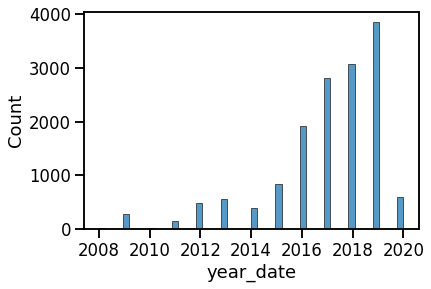

In [ ]:
# cantidad de noticias por año
seaborn.histplot(df_news['year_date'])

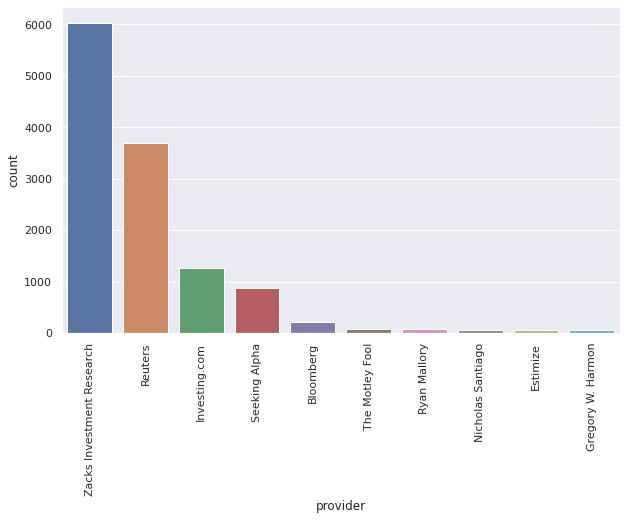

In [ ]:
# cantidad de noticias por provider
seaborn.set(rc={'figure.figsize':(10,6)})
seaborn.countplot(data=df_news, x='provider', order=df_news.provider.value_counts().iloc[:10].index)
plt.xticks(rotation=90);

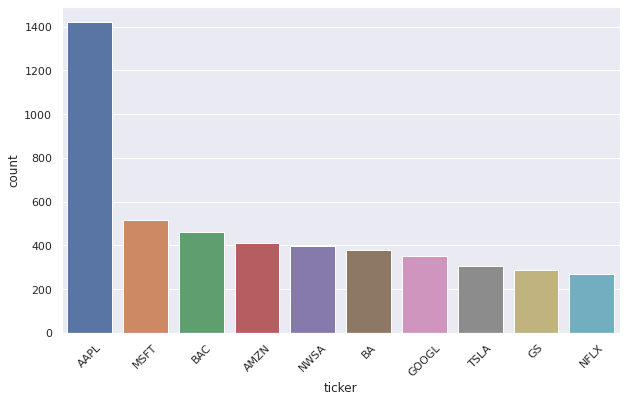

In [ ]:
# Cantidad de noticias por ticker
seaborn.set(rc={'figure.figsize':(10,6)})
seaborn.countplot(data=df_news, x='ticker', order=df_news.ticker.value_counts().iloc[:10].index)
plt.xticks(rotation=45);

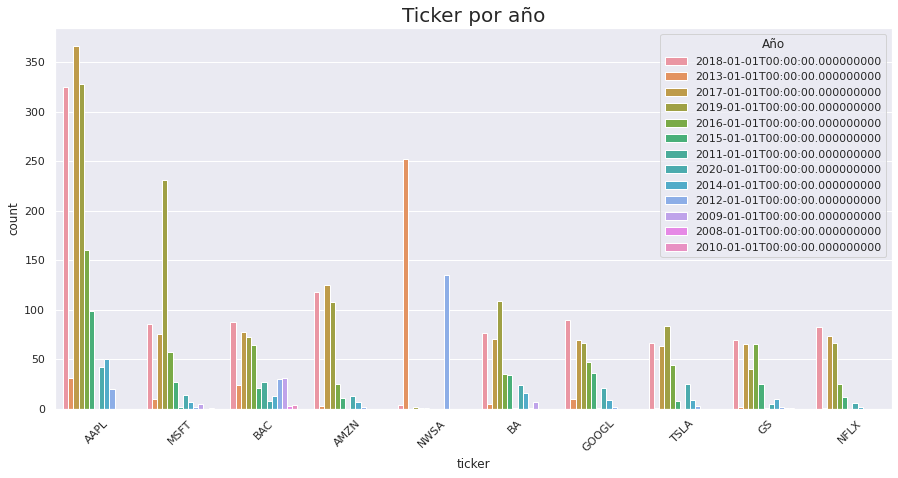

In [ ]:
# Cantidad de noticias por ticker por año (FALTA ORDENAR POR AÑO)

seaborn.set(rc={'figure.figsize':(15,7)})
seaborn.countplot(data=df_news, x='ticker', hue='year_date', order=df_news.ticker.value_counts().iloc[:10].index)

plt.title('Ticker por año', fontsize=20)
# plt.xlabel('Medio', fontsize=20)
plt.xticks(rotation=45)
plt.legend(loc='upper right', title="Año")
# plt.yscale('log')


In [ ]:
# convierto columna title en lista para ver frecuencia de palabras
listado_palabras = df_news['title'].tolist()

print("the list of a single column from the dataframe\n",
        listado_palabras,
        "\n",
        type(listado_palabras))

the list of a single column from the dataframe
 ['Take Five  World markets themes for the week ahead', 'Tuesday  July 23  Futures Higher On Earnings', 'Morgan Stanley downgrades Trivago on increasing headwinds', 'PBOC cuts banks  reserve requirement', 'Microsoft nudges S P 500 toward record high', 'UBS retains positions as world s biggest private bank  study', 'Top Analyst Reports For Oracle  U S  Bancorp   Enterprise Products ', 'Oil up Nearly 7  on Week After Saudi Attack', 'Finding Opportunity  The Equity Risk Premium', 'Continued Tech Sell Off Leads U S  Markets Lower', 'Trump tariffs force companies to rework supply chains', 'WarnerMedia talks late 2019 streaming plans', 'Regions Financial Closes Acquisition Of Highland Associates', 'Asia stocks mixed  Nikkei rallies 2 2  as BoJ announces fresh easing', 'Bear Of The Day  Wells Fargo  WFC ', 'Improve Your Retirement Income With These 3 Top Ranked Dividend Stocks   December 05  2019', 'Amazon Pushes Further Expansion  Shares To Rise

In [ ]:
# convierto lista en palabras 
lista_palabras = " ".join(listado_palabras)
print(lista_palabras)

Take Five  World markets themes for the week ahead Tuesday  July 23  Futures Higher On Earnings Morgan Stanley downgrades Trivago on increasing headwinds PBOC cuts banks  reserve requirement Microsoft nudges S P 500 toward record high UBS retains positions as world s biggest private bank  study Top Analyst Reports For Oracle  U S  Bancorp   Enterprise Products  Oil up Nearly 7  on Week After Saudi Attack Finding Opportunity  The Equity Risk Premium Continued Tech Sell Off Leads U S  Markets Lower Trump tariffs force companies to rework supply chains WarnerMedia talks late 2019 streaming plans Regions Financial Closes Acquisition Of Highland Associates Asia stocks mixed  Nikkei rallies 2 2  as BoJ announces fresh easing Bear Of The Day  Wells Fargo  WFC  Improve Your Retirement Income With These 3 Top Ranked Dividend Stocks   December 05  2019 Amazon Pushes Further Expansion  Shares To Rise The Netflix decade  How one company changed the way we watch TV Stocks   Dow Rallies on Trade Hop

In [ ]:
# Elimino caracteres numéricos
import re

lista_palabras = re.sub(r'[0-9]+', '', lista_palabras)
print(lista_palabras)

Take Five  World markets themes for the week ahead Tuesday  July   Futures Higher On Earnings Morgan Stanley downgrades Trivago on increasing headwinds PBOC cuts banks  reserve requirement Microsoft nudges S P  toward record high UBS retains positions as world s biggest private bank  study Top Analyst Reports For Oracle  U S  Bancorp   Enterprise Products  Oil up Nearly   on Week After Saudi Attack Finding Opportunity  The Equity Risk Premium Continued Tech Sell Off Leads U S  Markets Lower Trump tariffs force companies to rework supply chains WarnerMedia talks late  streaming plans Regions Financial Closes Acquisition Of Highland Associates Asia stocks mixed  Nikkei rallies    as BoJ announces fresh easing Bear Of The Day  Wells Fargo  WFC  Improve Your Retirement Income With These  Top Ranked Dividend Stocks   December    Amazon Pushes Further Expansion  Shares To Rise The Netflix decade  How one company changed the way we watch TV Stocks   Dow Rallies on Trade Hopes  Surge in Boeing

In [ ]:
type(lista_palabras)

str

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

# Stop words
stops = set(stopwords.words('english'))

palabrasvac = ['a', 'about', 'above', 'across', 'after', 'afterwards']
palabrasvac += ['again', 'against', 'all', 'almost', 'alone', 'along']
palabrasvac += ['already', 'also', 'although', 'always', 'am', 'among']
palabrasvac += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another']
palabrasvac += ['any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
palabrasvac += ['are', 'around', 'as', 'at', 'back', 'be', 'became']
palabrasvac += ['because', 'become', 'becomes', 'becoming', 'been']
palabrasvac += ['before', 'beforehand', 'behind', 'being', 'below']
palabrasvac += ['beside', 'besides', 'between', 'beyond', 'bill', 'both']
palabrasvac += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant']
palabrasvac += ['co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
palabrasvac += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due']
palabrasvac += ['during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
palabrasvac += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever']
palabrasvac += ['every', 'everyone', 'everything', 'everywhere', 'except']
palabrasvac += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first']
palabrasvac += ['five', 'for', 'former', 'formerly', 'forty', 'found']
palabrasvac += ['four', 'from', 'front', 'full', 'further', 'get', 'give']
palabrasvac += ['go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
palabrasvac += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers']
palabrasvac += ['herself', 'him', 'himself', 'his', 'how', 'however']
palabrasvac += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed']
palabrasvac += ['interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
palabrasvac += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made']
palabrasvac += ['many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
palabrasvac += ['more', 'moreover', 'most', 'mostly', 'move', 'much']
palabrasvac += ['must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
palabrasvac += ['nevertheless', 'next', 'nine', 'no', 'nobody', 'none']
palabrasvac += ['noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
palabrasvac += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or']
palabrasvac += ['other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
palabrasvac += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please']
palabrasvac += ['put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
palabrasvac += ['seeming', 'seems', 'serious', 'several', 'she', 'should']
palabrasvac += ['show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
palabrasvac += ['some', 'somehow', 'someone', 'something', 'sometime']
palabrasvac += ['sometimes', 'somewhere', 'still', 'such', 'system', 'take']
palabrasvac += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves']
palabrasvac += ['then', 'thence', 'there', 'thereafter', 'thereby']
palabrasvac += ['therefore', 'therein', 'thereupon', 'these', 'they']
palabrasvac += ['thick', 'thin', 'third', 'this', 'those', 'though', 'three']
palabrasvac += ['three', 'through', 'throughout', 'thru', 'thus', 'to']
palabrasvac += ['together', 'too', 'top', 'toward', 'towards', 'twelve']
palabrasvac += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon']
palabrasvac += ['us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
palabrasvac += ['whatever', 'when', 'whence', 'whenever', 'where']
palabrasvac += ['whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
palabrasvac += ['wherever', 'whether', 'which', 'while', 'whither', 'who']
palabrasvac += ['whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
palabrasvac += ['within', 'without', 'would', 'yet', 'you', 'your']
palabrasvac += ['yours', 'yourself', 'yourselves']
palabrasvac += ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
palabrasvac += [stops]
palabrasvac

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'computer',
 'con',
 'could',
 'couldnt',
 'cry',
 'de',
 'describe',
 'detail',
 'did',
 'do',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eg',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'etc',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'fill',
 'find',
 'fire',
 'fi

In [ ]:


# Tokenizamos el texto
tokenizer = RegexpTokenizer("[\w]+")
word_tokens = tokenizer.tokenize(lista_palabras)

# Sacamos stopwords y convertimos en minúscula
text_tokens_english = [word.lower() for word in word_tokens if word not in palabrasvac]

# convierto string en lista
lista_palabras_tokenizadas = " ".join(text_tokens_english).lower()
print(lista_palabras_tokenizadas)


take five world markets themes week ahead tuesday july futures higher on earnings morgan stanley downgrades trivago increasing headwinds pboc cuts banks reserve requirement microsoft nudges s p record high ubs retains positions world biggest private bank study top analyst reports for oracle u s bancorp enterprise products oil nearly week after saudi attack finding opportunity the equity risk premium continued tech sell off leads u s markets lower trump tariffs force companies rework supply chains warnermedia talks late streaming plans regions financial closes acquisition of highland associates asia stocks mixed nikkei rallies boj announces fresh easing bear of the day wells fargo wfc improve your retirement income with these top ranked dividend stocks december amazon pushes further expansion shares to rise the netflix decade how company changed way watch tv stocks dow rallies trade hopes surge boeing crude oil futures weekly outlook december bartosiak trading alphabet google earnings w

In [ ]:
from nltk import FreqDist


minusculas = lista_palabras.lower()
lista_final = minusculas.split()

# Calculamos la frecuencia de las palabras
freq = FreqDist(lista_final for lista_final in lista_final if lista_final not in palabrasvac)
sorted_by_value = sorted(freq.items(), key=lambda kv: kv[1], reverse=False)
for key,val in sorted_by_value:
    print ('{}: {}'.format(key, val))

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

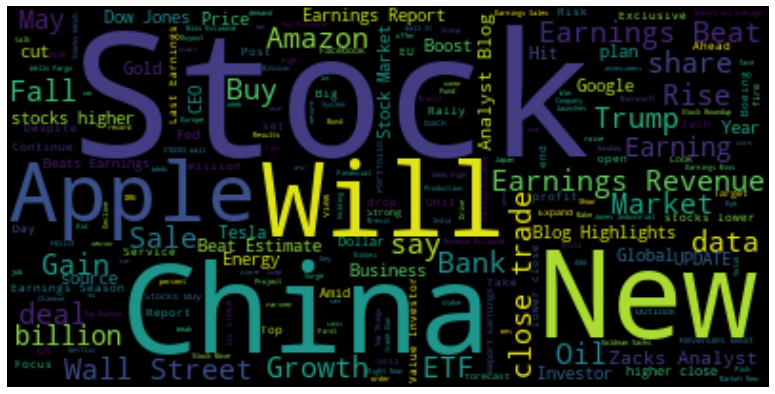

In [ ]:
# Nube de palabras de todos los titles
from wordcloud import WordCloud

wordcloud = WordCloud().generate(lista_palabras)
%pylab inline
import matplotlib.pyplot as plt
seaborn.set(rc={'figure.figsize':(15,7)})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
# Transformaciones para graficar nube de palabras de Apple

df_mask_apple = df_news['ticker']=='AAPL'

filtered_df_apple = df_news[df_mask_apple]

In [ ]:
# convierto columna title en lista para ver frecuencia de palabras
listado_palabras_apple = filtered_df_apple['title'].tolist()

print("the list of a single column from the dataframe\n",
        listado_palabras_apple,
        "\n",
        type(listado_palabras_apple))
# convierto lista en palabras
lista_palabras_apple = " ".join(listado_palabras_apple)
print(lista_palabras_apple)

the list of a single column from the dataframe
 ['Continued Tech Sell Off Leads U S  Markets Lower', 'Bartosiak  Trading Alphabet s  Google  Earnings With Options ', 'Market Update   13 05 2016', '5 Mutual Funds To Buy On Google s  Compelling  Performance', 'Intel  INTC  Faces Security Issues  Shares Down More Than 3 ', 'The Zacks Analyst Blog Highlights  Bristol Myers Squibb Company  Celgene  Exact Sciences  Pfizer And Guardant Health', 'Winners   Losers From The U S  China Trade Problem', 'Here s Why Best Buy  BBY  Could Be A Great Value Stock ', 'Examining 3 Slices Of AAPL', 'SCANA  SCG  Reports Loss In Q4 ', 'Exclusive  Qualcomm set to win conditional Japanese antitrust okay for NXP deal   source', 'Opening Bell  Tech Selloff Goes Global  Metals Fall  GBP  Climbs', 'Goldman Sachs cuts forecast for Apple iPhone  revenue', '3 Top Rated Goldman Sachs Mutual Funds To Invest In', 'Apple  AAPL  Beats On Surprise China Numbers  Plus EA  MDLZ', 'General Electric  GE  Beats Q2 Earnings Esti

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

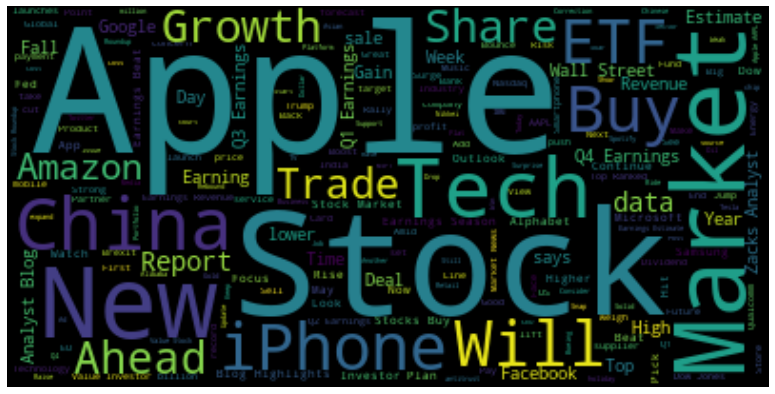

In [ ]:
# Grafico nube de palabras de Apple
wordcloud = WordCloud().generate(lista_palabras_apple)
%pylab inline
import matplotlib.pyplot as plt
seaborn.set(rc={'figure.figsize':(15,7)})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
# Transformaciones para graficar nube de palabras de Microsoft

df_mask_microsoft = df_news['ticker']=='MSFT'

filtered_df_microsoft = df_news[df_mask_microsoft]

In [ ]:
# convierto columna title en lista para ver frecuencia de palabras
listado_palabras_microsoft = filtered_df_microsoft['title'].tolist()

print("the list of a single column from the dataframe\n",
        listado_palabras_microsoft,
        "\n",
        type(listado_palabras_microsoft))
# convierto lista en palabras
lista_palabras_microsoft = " ".join(listado_palabras_microsoft)
print(lista_palabras_microsoft)

the list of a single column from the dataframe
 ['Microsoft nudges S P 500 toward record high', 'Cabot  COG  Beats On Q2 Earnings  Expands Buyback  FCF Soars', 'Morgan Stanley updates high conviction list', 'Pentagon deal to boost Microsoft s position in cloud computing  analysts', '4 Internet Stocks Set To Beat Estimates In Q2 Earnings', 'Stock Market News For Jun 12  2019', 'Liberty Property  LPT  Up 1 6  On Q1 FFO Beat  Raises Guidance', 'Zara owner Ortega buys  550 million Madrid skyscraper', 'EU U S  commercial data transfer pact enters into force', 'CNBC  Microsoft and Google spoke to Qualcomm against Broadcom offer', 'GameStop  GME  Trimmed Outlook On Soft Video Game Sales ', 'Top Ranked Income Stocks To Buy For September 4th', 'Stock Market News For May 10  2019', 'The Zacks Analyst Blog Highlights  Amazon  Procter   Gamble  Chevron  United Parcel Service And Raytheon', 'Bristol Myers  Reblozyl To Be Reviewed By FDA Committee', 'Visa  V  To Report Q2 Earnings  What s In The Car

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

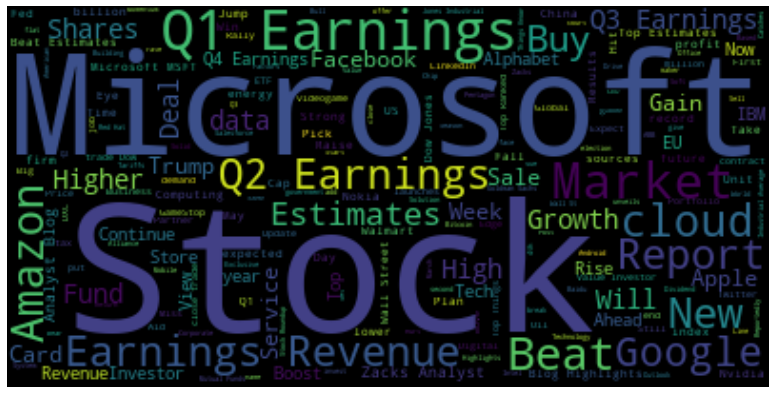

In [ ]:
# Grafico nube de palabras de Microsoft
wordcloud = WordCloud().generate(lista_palabras_microsoft)
%pylab inline
import matplotlib.pyplot as plt
seaborn.set(rc={'figure.figsize':(15,7)})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
# Transformaciones para graficar nube de palabras de Bank of America

df_mask_bac = df_news['ticker']=='BAC'

filtered_df_bac = df_news[df_mask_bac]

In [ ]:
# convierto columna title en lista para ver frecuencia de palabras
listado_palabras_bac = filtered_df_bac['title'].tolist()

print("the list of a single column from the dataframe\n",
        listado_palabras_bac,
        "\n",
        type(listado_palabras_bac))
# convierto lista en palabras
lista_palabras_bac = " ".join(listado_palabras_bac)
print(lista_palabras_bac)

the list of a single column from the dataframe
 ['UBS retains positions as world s biggest private bank  study', 'US STOCKS Wall St slides 2 pct after job growth stalls', 'Futures Lower On Debt Ceiling Fears ', 'Citigroup becomes last big U S  bank to join payments network', 'U S  shares close higher on ISM  shrug off euro crisis  Dow up 0 22 ', 'BofA turns  bullish  on muni bonds in 2019', 'Weekend Update  Treasuries Still Heading Higher', 'JPMorgan profit rises 24 percent as U S  election stimulates trading', 'Merck KGaA clinches  6 5 billion Versum takeover in bet on electrochemicals', 'Global Market Wrap  Poor Momentum Seen In Wednesday Trade', 'U S  stocks lower in afternoon trade  Dow down 0 8 ', 'First Quarter Earnings Reporting Season Gets Underway', 'CBS CEO Moonves says  no active discussions  with Viacom', 'Swap risks spur Illinois search for legal expert', 'Morgan Stanley shuffles wealth management unit', 'Berkshire Stocks Up On American Banks  Here s Why ', 'UPDATE 1 Moncl

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

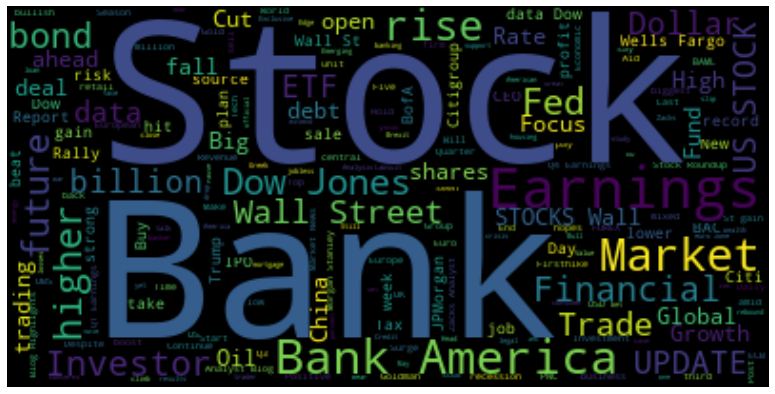

In [ ]:
# Grafico nube de palabras de Bank of America
wordcloud = WordCloud().generate(lista_palabras_bac)
%pylab inline
import matplotlib.pyplot as plt
seaborn.set(rc={'figure.figsize':(15,7)})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
# Transformaciones para graficar nube de palabras de Amazon

df_mask_amz = df_news['ticker']=='AMZN'

filtered_df_amz = df_news[df_mask_amz]

In [ ]:
# convierto columna title en lista para ver frecuencia de palabras
listado_palabras_amz = filtered_df_amz['title'].tolist()

print("the list of a single column from the dataframe\n",
        listado_palabras_amz,
        "\n",
        type(listado_palabras_amz))
# convierto lista en palabras
lista_palabras_amz = " ".join(listado_palabras_amz)
print(lista_palabras_amz)

the list of a single column from the dataframe
 ['Bear Of The Day  Wells Fargo  WFC ', 'Amazon Pushes Further Expansion  Shares To Rise', 'Should You Sell UGI Corporation  UGI  Before Earnings ', 'CVS Health Stock Jumps On Bullish Coverage  Time To Buy ', 'Target could be the biggest winner in the Toys R Us sweepstakes', 'Box Office   Angel Has Fallen  Rises to No  1 With  21 million debut', 'Echoing Trump  Mexico presidential frontrunner chides Amazon on Twitter', 'Amazon tests water in Israel with website to attract local sellers', 'U S  appeals court will not reconsider net neutrality repeal ruling', 'With package theft at an all time high  Amazon and others are fighting back', 'U S  travel to Brazil jumps 39  with visa waiver', 'Survey of Customer Comfort With Amazon Branded Products Includes Crypto', 'Teen in Lincoln Memorial protest sues Washington Post for  250 million', 'Wal Mart closing in on Amazon ', 'What s In Store For Alliance Resource  ARLP  In Q3 Earnings ', 'Ensco  ESV

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

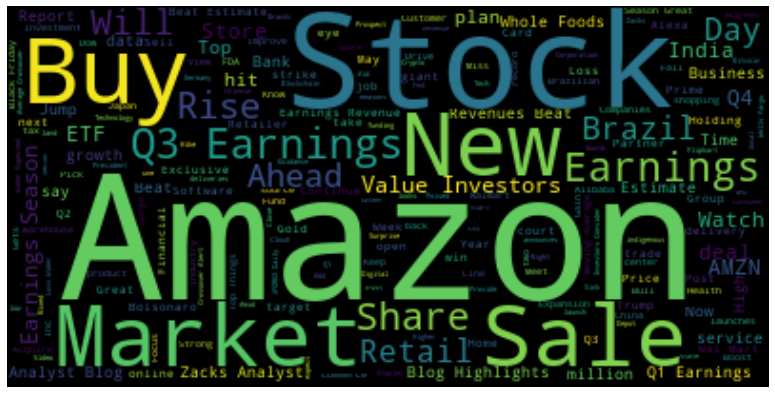

In [ ]:
# Grafico nube de palabras de Amazon
wordcloud = WordCloud().generate(lista_palabras_amz)
%pylab inline
import matplotlib.pyplot as plt
seaborn.set(rc={'figure.figsize':(15,7)})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

##**Dataset financial_data**

In [ ]:
#leer csv financial data
url = 'https://drive.google.com/file/d/1nd0-UEjvJUigWm1NyM0DTSaz2eR__8Y5/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df_financial = pd.read_csv(dwn_url)

df_financial.head()

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1       VIPS  3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
2         KR  9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
3        RAD  2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
4        GIS  1.790960e+10          0.0076     1.153980e+10  6.369800e+09   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0  0.000000e+00  2.146100e+10        2.146100e+10      1.391000e+10   
1  1.083303e+08  3.441414e+08        7.939267e+08      1.345959e+08   
2  0.000000e+00  1.519600e+10        1.751200e+10      2.725000e+09   
3  0.000000e+00  6.561162e+09        6.586482e+09      7.372520e+08   
4  0.000000e+00  3.474300e+09        3.412400e+09      2.957400e+09   

   Interest Expense  ...  SG&A Expenses Growth              Sector  \
0      7.090000e+08  ...               -0.1746  Consumer Defensive   
1      1.214869e+07  ...                1.7313  Consumer Defensive   
2      4.430000e+08  ...                0.0234  Consumer Defensive   
3      4.245910e+08  ...               -0.0060  Consumer Defensive   
4      3.024000e+08  ...               -0.0220  Consumer Defensive   

   2015 PRICE VAR [%]  Class  year  2016 PRICE VAR [%]  2017 PRICE VAR [%]  \
0           -9.323276      0  2014                 NaN                 NaN   
1          -25.512193      0  2014                 NaN                 NaN   
2           33.118297      1  2014                 NaN                 NaN   
3            2.752291      1  2014                 NaN                 NaN   
4           12.897715      1  2014                 NaN                 NaN   

   2018 PRICE VAR [%]  2019 PRICE VAR [%]  AnualPriceVariation  
0                 NaN                 NaN            -9.323276  
1                 NaN                 NaN           -25.512193  
2                 NaN                 NaN            33.118297  
3                 NaN                 NaN             2.752291  
4                 NaN                 NaN            12.897715  

[5 rows x 231 columns]

###**Visualizacion de distribuciones de indicadores (CATA Y FRAN)**
Que son estos indicadores? como se calculan?

Explorar indicadores, para identificar límites, distribución, extraer medidas de tendencia central, medidas de dispersión, outliers y valores NaN(Nulos).

In [ ]:
print(df_financial.columns.values)
print(f"Cant. Columnas: {len(df_financial.columns.values)}")

['Unnamed: 0' 'Revenue' 'Revenue Growth' 'Cost of Revenue' 'Gross Profit'
 'R&D Expenses' 'SG&A Expense' 'Operating Expenses' 'Operating Income'
 'Interest Expense' 'Earnings before Tax' 'Income Tax Expense'
 'Net Income - Non-Controlling int' 'Net Income - Discontinued ops'
 'Net Income' 'Preferred Dividends' 'Net Income Com' 'EPS' 'EPS Diluted'
 'Weighted Average Shs Out' 'Weighted Average Shs Out (Dil)'
 'Dividend per Share' 'Gross Margin' 'EBITDA Margin' 'EBIT Margin'
 'Profit Margin' 'Free Cash Flow margin' 'EBITDA' 'EBIT'
 'Consolidated Income' 'Earnings Before Tax Margin' 'Net Profit Margin'
 'Cash and cash equivalents' 'Short-term investments'
 'Cash and short-term investments' 'Receivables' 'Inventories'
 'Total current assets' 'Property, Plant & Equipment Net'
 'Goodwill and Intangible Assets' 'Long-term investments' 'Tax assets'
 'Total non-current assets' 'Total assets' 'Payables' 'Short-term debt'
 'Total current liabilities' 'Long-term debt' 'Total debt'
 'Deferred revenu

Basandonos en los siguientes articulos [artículo1](https://upskillcoach.com/blog/financial-key-performance-indicators/), [artículo2](https://www.freshbooks.com/blog/financial-kpis-strategy) eleguimos los indicadores financieros para trabajar, estos son: 

1.  **EBITDA, Ingresos operativos (Situacion Economica)**: Ingresos antes de intereses, impuestos y depreciaciones. Capacidad de generar ingresos de las actividades operativos.
 '5Y Operating CF Growth (per Share)' '3Y Operating CF Growth (per Share)' para analizar el crecimiento de los ingresos a lo largo de los años.
2. **Working Capital (situacion financiera a corto plazo)**: Capital de Trabajo. Relacion con partidas corrientes. 
3. **Endeudamiento a Largo Plazo (Situacion financiera a Largo Plazo)**: Ratio de endeudamiento y cobertura de interes. Analisis de componetes patrimoniales totales y no corrientes.



Filtramos los indicadores

In [ ]:
interesting_columns=['Unnamed: 0','Revenue Growth','Gross Profit','Current ratio','Working Capital','Total current assets','Total current liabilities',
                     'Net cash flow / Change in cash','priceToSalesRatio','priceEarningsRatio','Net Profit Margin',
                     'year','Sector','2015 PRICE VAR [%]','2016 PRICE VAR [%]','2017 PRICE VAR [%]','2018 PRICE VAR [%]',
                     '2019 PRICE VAR [%]','AnualPriceVariation','EBITDA','ROE','Interest Coverage','Operating Cash Flow','EPS Growth','returnOnAssets','Net Income per Share', 'Total shareholders equity', 'Total assets',
                     'Total liabilities', 'Total non-current assets','Total non-current liabilities', 'totalDebtToCapitalization', 'Debt to Equity']

Creamos un nuevo dataset con las columnas de interes

In [ ]:
df_financial_ic = df_financial[interesting_columns]
df_financial_ic = df_financial_ic.rename({'Unnamed: 0': 'ticker'}, axis=1)
print(f"Cant. Columnas: {len(df_financial_ic.columns.values)}")
print(f"Cant. datos: {len(df_financial_ic)}")
pd.options.display.float_format = '{:,.2f}'.format
df_financial_ic[:100]

Cant. Columnas: 33
Cant. datos: 22077


ticker  Revenue Growth      Gross Profit  Current ratio   Working Capital  \
0      PG           -0.07 35,371,000,000.00           0.94 -2,109,000,000.00   
1    VIPS            1.17    928,522,602.52           0.21  3,065,163,000.00   
2      KR            0.02 20,237,000,000.00           0.82 -1,875,000,000.00   
3     RAD            0.01  7,323,734,000.00           1.71  1,777,673,000.00   
4     GIS            0.01  6,369,800,000.00           0.81 -1,030,000,000.00   
..    ...             ...               ...            ...               ...   
95   LANC            0.03    248,568,000.00           5.32    298,219,000.00   
96    SAM            0.22    465,011,000.00           1.88     97,292,000.00   
97    WMK            0.03    752,962,000.00           2.12    229,595,000.00   
98   STRA           -0.11    209,738,000.00           3.49    140,316,000.00   
99    GPX            0.15     89,575,000.00           1.37     43,537,000.00   

    Total current assets  Total current liabilities  \
0      31,617,000,000.00          33,726,000,000.00   
1       2,134,396,835.65           1,639,536,809.82   
2       8,830,000,000.00          10,705,000,000.00   
3       4,285,125,000.00           2,507,452,000.00   
4       4,393,500,000.00           5,423,500,000.00   
..                   ...                        ...   
95        367,291,000.00              69,072,000.00   
96        207,462,000.00             110,170,000.00   
97        434,393,000.00             204,798,000.00   
98        196,651,000.00              56,335,000.00   
99        160,357,000.00             116,820,000.00   

    Net cash flow / Change in cash  priceToSalesRatio  priceEarningsRatio  \
0                 2,618,000,000.00               2.86               18.76   
1                   446,316,919.60               0.04               81.55   
2                   163,000,000.00               0.19               12.03   
3                    16,954,000.00               0.25               28.61   
4                   125,900,000.00               1.86               18.70   
..                             ...                ...                 ...   
95                   88,154,000.00               2.50               34.60   
96                   26,878,000.00               4.26               42.31   
97                    5,021,000.00               0.46               23.65   
98                   67,523,000.00               1.82               16.92   
99                    8,894,000.00               1.16               23.40   

    ...  EPS Growth  returnOnAssets Net Income per Share  \
0   ...        0.04            0.58                 4.30   
1   ...        1.46            0.04                 9.20   
2   ...        0.06            0.10                 1.48   
3   ...        0.92            0.07                 5.16   
4   ...        0.01            0.63                 2.97   
..  ...         ...             ...                  ...   
95  ...       -0.31            0.16                 2.75   
96  ...        0.27            0.19                 7.00   
97  ...       -0.26            0.06                 2.02   
98  ...        1.83            0.21                 4.39   
99  ...        0.17            0.53                 1.45   

    Total shareholders equity       Total assets  Total liabilities  \
0           69,976,000,000.00 144,266,000,000.00  74,290,000,000.00   
1              412,354,536.65   2,736,687,278.01   2,301,093,477.56   
2            5,384,000,000.00  29,281,000,000.00  23,886,000,000.00   
3           -2,113,702,000.00   6,944,871,000.00   9,058,573,000.00   
4            6,534,800,000.00  23,145,700,000.00  15,156,200,000.00   
..                        ...                ...                ...   
95             528,597,000.00     638,630,000.00     110,033,000.00   
96             436,140,000.00     605,161,000.00     169,021,000.00   
97             844,763,000.00   1,191,119,000.00     346,356,000.00   
98              92,732,00

In [ ]:
# funcion para eliminar outliers
def clean_outliers(df_origin,column_name, o_min, o_max):
  try:
    print(f"len before: {len(df_origin)}")
    df_woo = df_origin[(df_origin[column_name] > df_origin[column_name].quantile(o_min)) \
            & (df_origin[column_name] < df_origin[column_name].quantile(o_max))]
    print(f"len after: {len(df_woo)}")
    return df_woo
  except:
      print("error")
df_financial_ic_woo = df_financial_ic.copy() #se crea una copia para quitarle los outliers a esta



In [ ]:
def hist_and_box(df,column_name):
  fig, axes = plt.subplots(ncols=2, figsize=(20,4))
  g = seaborn.histplot(x= df[column_name], bins= 50, kde=True, ax= axes[0])
  axes[0].axvline(x=df[column_name].mean(), color='green', label=f'x̄: {round(df[column_name].mean(),2)}')
  axes[0].axvline(x=df[column_name].median(), color='firebrick', label=f'Median: {round(df[column_name].median(),2)}')
  axes[0].legend()
  g = seaborn.boxplot(x= df[column_name], ax= axes[1])

In [ ]:
def status(data):

    data2=data 

    # total de rows
    tot_rows=len(data2)
    
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    
    # percentage of nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    
    # num of zeros
    d2['q_zeros']=(data2==0).sum().values

    # perc of zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows

    # total unique values
    d2['unique']=data2.nunique().values
    
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    
    return(d2)

####**1.** EBITDA e Ingresos operativos

El EBITDA (earnings before interests, taxes and depreciation) es una medida de ingresos creada con el objeto de ser capaz de comparar distintas empresas. Sin importar el sector o matriz impositiva donde se desempeñe. Esto es asi porque nos indica los resultados que obtuvo una empresa sin considerar los intereses (ganados o perdidos), impuestos y depreciaciones de Activos Fijos. 

Por otro lado, usaremos los ingresos operativos para conocer la capacidad de generacion de ingresos que tenga la empresa. 



**PROCESO PARA TODOS LOS INDICADORES**
1- Filtramos el DF con las variables de intereses segun el indicador a analizar.
2- Realizaremos un "describe" para tener una primera impresion de los datos. 
3- Eliminacion de outliers y variables nulas. 
4- Analisis de variables.

In [ ]:
economic_columns=['ticker','year','Sector','2015 PRICE VAR [%]','2016 PRICE VAR [%]','2017 PRICE VAR [%]','2018 PRICE VAR [%]',
                     '2019 PRICE VAR [%]','AnualPriceVariation','EBITDA','ROE','Operating Cash Flow','EPS Growth','returnOnAssets','Net Income per Share']

In [ ]:
economic_df = df_financial_ic[economic_columns]
economic_df.shape

(22077, 15)

In [ ]:
economic_df.describe()

year  2015 PRICE VAR [%]  2016 PRICE VAR [%]  2017 PRICE VAR [%]  \
count 22,077.00            3,808.00            4,120.00            4,797.00   
mean   2,016.09              975.16              103.08              365.03   
std        1.37           40,984.61            3,756.53           19,401.49   
min    2,014.00             -100.40              -99.95             -100.00   
25%    2,015.00              -28.57               -5.17               -6.73   
50%    2,016.00               -5.28               17.28               10.91   
75%    2,017.00               13.31               40.57               31.56   
max    2,018.00        2,418,600.92          212,700.01        1,321,280.80   

       2018 PRICE VAR [%]  2019 PRICE VAR [%]  AnualPriceVariation  \
count            4,960.00            4,392.00            22,077.00   
mean                -4.46               20.80               269.89   
std                561.80               82.62            19,346.17   
min               -100.00              -99.86              -100.40   
25%                -33.39               -7.48               -19.47   
50%                -13.34               17.64                 3.91   
75%                  2.12               39.63                27.51   
max             39,220.00            3,756.72         2,418,600.92   

                  EBITDA           ROE  Operating Cash Flow  EPS Growth  \
count          20,323.00     19,737.00            20,909.00   19,894.00   
mean      928,982,019.40      1,646.11     1,073,238,606.85        0.28   
std     4,464,530,765.11    114,827.94    16,150,911,845.78       37.75   
min   -16,484,000,000.00    -34,772.46  -340,000,000,000.00   -2,125.00   
25%         1,569,000.00         -0.07         1,146,282.00       -0.32   
50%        70,758,000.00          0.07        56,987,000.00        0.10   
75%       411,612,000.00          0.15       329,621,000.00        0.58   
max   233,721,000,000.00 11,141,141.67   960,000,000,000.00    4,378.05   

       returnOnAssets  Net Income per Share  
count       15,542.00             19,632.00  
mean            -0.07             12,909.94  
std              8.36            485,543.63  
min           -344.44        -12,724,877.50  
25%             -0.16                 -0.41  
50%              0.04                  0.72  
75%              0.17                  2.24  
max            345.63         29,790,471.67

In [ ]:
status(economic_df) #Por la cantidad de nans que tiene las columnas de variaciones anuales, se decidio eliminarlas. 

variable  q_nan  p_nan  q_zeros  p_zeros  unique     type
0                 ticker      0   0.00        0     0.00    4980   object
1                   year      0   0.00        0     0.00       5    int64
2                 Sector      0   0.00        0     0.00      11   object
3     2015 PRICE VAR [%]  18269   0.83        6     0.00    3798  float64
4     2016 PRICE VAR [%]  17957   0.81        7     0.00    4110  float64
5     2017 PRICE VAR [%]  17280   0.78        2     0.00    4788  float64
6     2018 PRICE VAR [%]  17117   0.78        3     0.00    4954  float64
7     2019 PRICE VAR [%]  17685   0.80        7     0.00    4381  float64
8    AnualPriceVariation      0   0.00       25     0.00   21940  float64
9                 EBITDA   1754   0.08        9     0.00   19443  float64
10                   ROE   2340   0.11       30     0.00    8975  float64
11   Operating Cash Flow   1168   0.05       34     0.00   19542  float64
12            EPS Growth   2183   0.10      256     0.01   12413  float64
13        returnOnAssets   6535   0.30       22     0.00    8871  float64
14  Net Income per Share   2445   0.11       42     0.00   17456  float64

In [ ]:
# economic_df.drop(labels = ['2015 PRICE VAR [%]','2016 PRICE VAR [%]','2017 PRICE VAR [%]','2018 PRICE VAR [%]',
#                      '2019 PRICE VAR [%]'], axis = 1, inplace = True)


In [ ]:
economic_df.describe() #Me llama mucho la atencion el ROE. 

year  2015 PRICE VAR [%]  2016 PRICE VAR [%]  2017 PRICE VAR [%]  \
count 22,077.00            3,808.00            4,120.00            4,797.00   
mean   2,016.09              975.16              103.08              365.03   
std        1.37           40,984.61            3,756.53           19,401.49   
min    2,014.00             -100.40              -99.95             -100.00   
25%    2,015.00              -28.57               -5.17               -6.73   
50%    2,016.00               -5.28               17.28               10.91   
75%    2,017.00               13.31               40.57               31.56   
max    2,018.00        2,418,600.92          212,700.01        1,321,280.80   

       2018 PRICE VAR [%]  2019 PRICE VAR [%]  AnualPriceVariation  \
count            4,960.00            4,392.00            22,077.00   
mean                -4.46               20.80               269.89   
std                561.80               82.62            19,346.17   
min               -100.00              -99.86              -100.40   
25%                -33.39               -7.48               -19.47   
50%                -13.34               17.64                 3.91   
75%                  2.12               39.63                27.51   
max             39,220.00            3,756.72         2,418,600.92   

                  EBITDA           ROE  Operating Cash Flow  EPS Growth  \
count          20,323.00     19,737.00            20,909.00   19,894.00   
mean      928,982,019.40      1,646.11     1,073,238,606.85        0.28   
std     4,464,530,765.11    114,827.94    16,150,911,845.78       37.75   
min   -16,484,000,000.00    -34,772.46  -340,000,000,000.00   -2,125.00   
25%         1,569,000.00         -0.07         1,146,282.00       -0.32   
50%        70,758,000.00          0.07        56,987,000.00        0.10   
75%       411,612,000.00          0.15       329,621,000.00        0.58   
max   233,721,000,000.00 11,141,141.67   960,000,000,000.00    4,378.05   

       returnOnAssets  Net Income per Share  
count       15,542.00             19,632.00  
mean            -0.07             12,909.94  
std              8.36            485,543.63  
min           -344.44        -12,724,877.50  
25%             -0.16                 -0.41  
50%              0.04                  0.72  
75%              0.17                  2.24  
max            345.63         29,790,471.67

In [ ]:
economicDF = clean_outliers(economic_df, "EBITDA", 0.05, 0.90) #Creamos un nuevo DF eliminando los ouliers del ebitda. 

len before: 22077
len after: 17272


In [ ]:
economicDF = clean_outliers(economicDF, "Operating Cash Flow", 0.05, 0.95) #Creamos un nuevo DF eliminando los ouliers de los ingresos operativos. 

len before: 17272
len after: 15507


In [ ]:
economicDF.describe()

year  2015 PRICE VAR [%]  2016 PRICE VAR [%]  2017 PRICE VAR [%]  \
count 15,507.00            2,910.00            3,001.00            3,188.00   
mean   2,016.05            1,273.44              131.74              115.32   
std        1.40           46,881.04            4,398.39            4,325.87   
min    2,014.00             -100.40              -99.95             -100.00   
25%    2,015.00              -29.12               -5.12              -11.70   
50%    2,016.00               -5.10               19.76                9.30   
75%    2,017.00               15.09               43.89               33.07   
max    2,018.00        2,418,600.92          212,700.01          238,700.00   

       2018 PRICE VAR [%]  2019 PRICE VAR [%]  AnualPriceVariation  \
count            3,277.00            3,131.00            15,507.00   
mean                -0.78               19.81               292.01   
std                690.20               92.75            20,499.77   
min               -100.00              -99.86              -100.40   
25%                -37.73              -12.05               -21.98   
50%                -15.45               15.65                 3.48   
75%                  3.70               39.45                29.36   
max             39,220.00            3,756.72         2,418,600.92   

                EBITDA           ROE  Operating Cash Flow  EPS Growth  \
count        15,507.00     15,122.00            15,507.00   14,935.00   
mean    164,907,683.01      2,148.49       130,971,204.74        0.49   
std     263,103,768.36    131,181.71       193,466,168.20       38.72   
min     -65,474,000.00    -34,772.46       -33,612,000.00   -1,439.00   
25%       2,805,000.00         -0.05         2,729,935.51       -0.29   
50%      50,464,000.00          0.07        44,008,000.00        0.11   
75%     220,099,000.00          0.14       185,791,500.00        0.62   
max   1,794,000,000.00 11,141,141.67       895,200,000.00    4,378.05   

       returnOnAssets  Net Income per Share  
count       11,822.00             15,036.00  
mean            -0.06              1,764.60  
std              8.19            345,051.47  
min           -344.44        -12,724,877.50  
25%             -0.11                 -0.26  
50%              0.05                  0.61  
75%              0.16                  1.87  
max            287.71         27,643,890.22

In [ ]:
# Ordenaremos el dataset por aquellas empresas con mayor ebitda, para luego comparar la varibale con el resto de indicadores economicos. 

economic_info = economicDF.groupby("Sector")

economic_info.mean()

year  2015 PRICE VAR [%]  2016 PRICE VAR [%]  \
Sector                                                                    
Basic Materials        2,016.08              206.36               55.26   
Communication Services 2,016.02               -4.33               12.84   
Consumer Cyclical      2,016.05               62.26               16.80   
Consumer Defensive     2,016.08               22.88               28.09   
Energy                 2,016.12              -24.94               24.56   
Financial Services     2,016.05              398.90               41.47   
Healthcare             2,015.98              468.94              478.72   
Industrials            2,016.06              -12.82               29.80   
Real Estate            2,016.06           12,609.93               21.26   
Technology             2,016.03            1,703.42              245.76   
Utilities              2,016.03               -3.47               32.61   

                        2017 PRICE VAR [%]  2018 PRICE VAR [%]  \
Sector                                                           
Basic Materials                      13.17              -24.12   
Communication Services               21.70               -8.76   
Consumer Cyclical                    20.12              -14.59   
Consumer Defensive                   13.99               -6.82   
Energy                               13.86              -27.59   
Financial Services                   30.03              -12.27   
Healthcare                          649.17              -16.36   
Industrials                          14.45              -17.80   
Real Estate                          58.88              -10.49   
Technology                           32.87               75.34   
Utilities                            17.19               -1.91   

                        2019 PRICE VAR [%]  AnualPriceVariation  \
Sector                                                            
Basic Materials                      19.91                48.75   
Communication Services                2.97                 5.16   
Consumer Cyclical                    14.40                18.98   
Consumer Defensive                   20.32                15.15   
Energy                               -7.47                -5.77   
Financial Services                   18.80                89.26   
Healthcare                           26.74               326.31   
Industrials                          20.21                 6.69   
Real Estate                          24.35             2,322.69   
Technology                           26.51               404.52   
Utilities                            22.59                13.37   

                               EBITDA       ROE  Operating Cash Flow  \
Sector                                                                 
Basic Materials        185,096,111.75     -0.05       150,530,225.54   
Communication Services 259,652,163.00      0.13       166,682,519.31   
Consumer Cyclical      242,931,302.00      0.12       174,956,509.18   
Consumer Defensive     194,356,597.84     -0.01       149,606,744.40   
Energy                 211,337,080.61     -1.36       193,009,663.55   
Financial Services     126,885,358.58 13,025.03       115,990,382.60   
Healthcare              58,417,589.82    -16.35        47,011,695.30   
Industrials            196,294,076.91      0.22       146,519,533.12   
Real Estate            263,256,225.79      0.07       177,000,357.91   
Technology             107,169,845.64      0.57       103,489,703.82   
Utilities              354,285,665.33      0.04       253,119,229.49   

                        EPS Growth  returnOnAssets  Net Income per Share  
Sector                                                                    
Basic Materials               0.49           -0.04                  3.32  
Communication Services        0.54            0.17                  8.34  
Consumer Cyclical             0.46            0.25                 -2.95  
Consumer

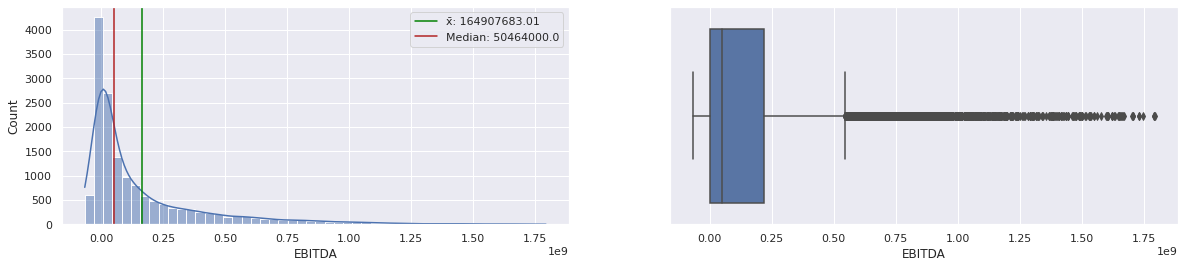

In [ ]:
hist_and_box(economicDF, 'EBITDA')

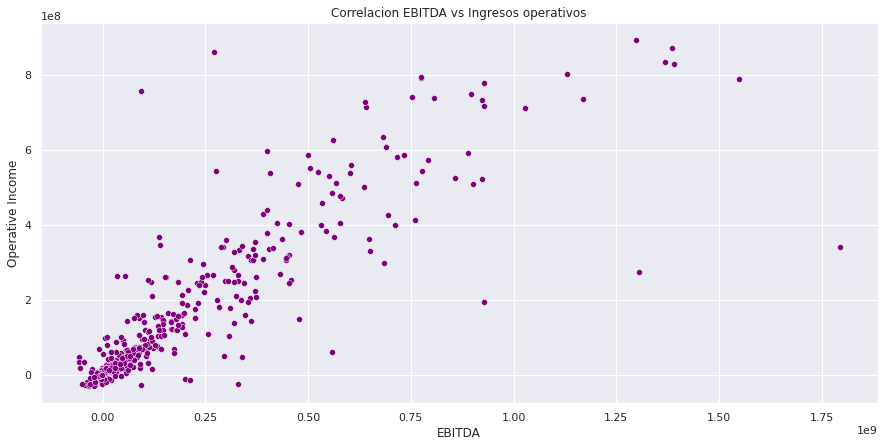

In [ ]:
seaborn.scatterplot(data = economicDF.sample(500), x = "EBITDA", y = "Operating Cash Flow", color = "purple")
plt.title("Correlacion EBITDA vs Ingresos operativos")
plt.xlabel("EBITDA")
plt.ylabel("Operative Income")
plt.show()

Como se logra observar en el grafico, el EBITDA y los ingresos operativos tienen una gran correlacion. Para corroboralo generaremos el cuadro de correlaciones.

In [ ]:
economicDF.corr()

year  2015 PRICE VAR [%]  2016 PRICE VAR [%]  \
year                  1.00                 NaN                 NaN   
2015 PRICE VAR [%]     NaN                1.00                 NaN   
2016 PRICE VAR [%]     NaN                 NaN                1.00   
2017 PRICE VAR [%]     NaN                 NaN                 NaN   
2018 PRICE VAR [%]     NaN                 NaN                 NaN   
2019 PRICE VAR [%]     NaN                 NaN                 NaN   
AnualPriceVariation  -0.02                1.00                1.00   
EBITDA                0.02               -0.02               -0.01   
ROE                   0.00               -0.00                0.00   
Operating Cash Flow   0.03               -0.02                0.00   
EPS Growth            0.01               -0.00               -0.00   
returnOnAssets        0.00                0.00                0.00   
Net Income per Share  0.01               -0.00               -0.00   

                      2017 PRICE VAR [%]  2018 PRICE VAR [%]  \
year                                 NaN                 NaN   
2015 PRICE VAR [%]                   NaN                 NaN   
2016 PRICE VAR [%]                   NaN                 NaN   
2017 PRICE VAR [%]                  1.00                 NaN   
2018 PRICE VAR [%]                   NaN                1.00   
2019 PRICE VAR [%]                   NaN                 NaN   
AnualPriceVariation                 1.00                1.00   
EBITDA                             -0.01                0.00   
ROE                                 0.00               -0.00   
Operating Cash Flow                -0.01                0.01   
EPS Growth                         -0.01                0.00   
returnOnAssets                      0.03                0.00   
Net Income per Share                0.00                0.00   

                      2019 PRICE VAR [%]  AnualPriceVariation  EBITDA   ROE  \
year                                 NaN                -0.02    0.02  0.00   
2015 PRICE VAR [%]                   NaN                 1.00   -0.02 -0.00   
2016 PRICE VAR [%]                   NaN                 1.00   -0.01  0.00   
2017 PRICE VAR [%]                   NaN                 1.00   -0.01  0.00   
2018 PRICE VAR [%]                   NaN                 1.00    0.00 -0.00   
2019 PRICE VAR [%]                  1.00                 1.00    0.03 -0.00   
AnualPriceVariation                 1.00                 1.00   -0.01 -0.00   
EBITDA                              0.03                -0.01    1.00 -0.01   
ROE                                -0.00                -0.00   -0.01  1.00   
Operating Cash Flow                 0.03                -0.01    0.87 -0.01   
EPS Growth                         -0.01                -0.00    0.01  0.00   
returnOnAssets                     -0.02                 0.00    0.03  0.01   
Net Income per Share                0.00                -0.00    0.05 -0.00   

                      Operating Cash Flow  EPS Growth  returnOnAssets  \
year                                 0.03        0.01            0.00   
2015 PRICE VAR [%]                  -0.02       -0.00            0.00   
2016 PRICE VAR [%]                   0.00       -0.00            0.00   
2017 PRICE VAR [%]                  -0.01       -0.01            0.03   
2018 PRICE VAR [%]                   0.01        0.00            0.00   
2019 PRICE VAR [%]                   0.03       -0.01           -0.02   
AnualPriceVariation                 -0.01       -0.00            0.00   
EBITDA                               0.87        0.01            0.03   
ROE                                 -0.01        0.00            0.01   
Operating Cash Flow                  1.00        0.01            0.03   
EPS Growth                           0.01        1.00            0.00   
returnOnAssets                       0.03        0.00            1.00   
Net Income per Share                 0.02        0.00            0.01   

              

**INDICADOR SITUACION FINANCIERA A CORTO PLAZO**

Los indicadores a tener en cuenta son:

Current Taxes: Son aquellos activos liquidos (efectivo en caja y/o bancos) como aquellos que se puedan convertir en una unidad de poder cancelatorio dentro del plazo de un año contado a partir del cierre del ejercicio.

Current liabilities: Son aquellos pasivos exigibles o que van a vencer dentro del plazo de un año contado a partir del cierre del ejercicio.

Current Ratio: Activo Corriente/Pasivo Corriente. Si el indicador es menor a uno (Liabilities > Assets) quiere decir que la empresa se encuentra en riesgo de solvencia financiera a corto plazo. 

Working Capital: Capital de trabajo neto, es la suma necesaria para la operatoria habitual de la empresa. Se calcula como CA - CL

In [ ]:
financialCP_df = df_financial_ic[['ticker','Sector','year', 'Total current assets','Total current liabilities', 'Current ratio','Working Capital']]

In [ ]:
financialCP_df.describe()

year  Total current assets  Total current liabilities  \
count 22,077.00             19,555.00                  19,549.00   
mean   2,016.09      5,381,980,047.51           7,412,083,755.84   
std        1.37     46,807,037,159.52          75,652,859,628.02   
min    2,014.00                  0.00         -21,077,918,781.73   
25%    2,015.00         66,866,000.00              27,423,000.00   
50%    2,016.00        278,621,000.00             175,781,000.00   
75%    2,017.00      1,211,290,740.74             998,602,000.00   
max    2,018.00  1,266,110,000,000.00       2,095,310,000,000.00   

       Current ratio           Working Capital  
count      15,561.00                 15,567.00  
mean            6.58       -288,120,683,912.63  
std           190.47     36,949,903,249,323.68  
min            -1.44 -4,610,011,857,040,454.00  
25%             1.16             10,061,000.00  
50%             1.90             91,272,000.00  
75%             3.35            388,492,000.00  
max        20,590.47     14,721,395,000,000.00

In [ ]:
financialCP_df['WC audit'] = financialCP_df['Total current assets'] - financialCP_df['Total current liabilities']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
financialCP_df["Control"] = financialCP_df["WC audit"] - financialCP_df['Working Capital']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
financialCP_df.head(20) #Como se puede observar no todas las columnas de Working Capital coinciden con nuestra formula planteada. Nos quedaremos con aquelas que el control = 0

ticker              Sector  year  Total current assets  \
0      PG  Consumer Defensive  2014     31,617,000,000.00   
1    VIPS  Consumer Defensive  2014      2,134,396,835.65   
2      KR  Consumer Defensive  2014      8,830,000,000.00   
3     RAD  Consumer Defensive  2014      4,285,125,000.00   
4     GIS  Consumer Defensive  2014      4,393,500,000.00   
5      PM  Consumer Defensive  2014     15,484,000,000.00   
6      KO  Consumer Defensive  2014     32,986,000,000.00   
7     WMT  Consumer Defensive  2014     61,185,000,000.00   
8    MDLZ  Consumer Defensive  2014     11,750,000,000.00   
9      MO  Consumer Defensive  2014      6,878,000,000.00   
10   ABEV  Consumer Defensive  2014      7,783,890,349.23   
11    TAL  Consumer Defensive  2014        300,376,622.00   
12   BRFS  Consumer Defensive  2014      6,567,142,320.69   
13    KHC  Consumer Defensive  2014      4,915,000,000.00   
14    NWL  Consumer Defensive  2014      2,292,200,000.00   
15    KMB  Consumer Defensive  2014      5,559,000,000.00   
16    CPB  Consumer Defensive  2014      2,100,000,000.00   
17    TGT  Consumer Defensive  2014     11,573,000,000.00   
18    HRL  Consumer Defensive  2014      2,132,771,000.00   
19    CAG  Consumer Defensive  2014      4,230,800,000.00   

    Total current liabilities  Current ratio   Working Capital  \
0           33,726,000,000.00           0.94 -2,109,000,000.00   
1            1,639,536,809.82           0.21  3,065,163,000.00   
2           10,705,000,000.00           0.82 -1,875,000,000.00   
3            2,507,452,000.00           1.71  1,777,673,000.00   
4            5,423,500,000.00           0.81 -1,030,000,000.00   
5           15,112,000,000.00           1.02    372,000,000.00   
6           32,374,000,000.00           1.02    612,000,000.00   
7           69,345,000,000.00           0.88 -8,160,000,000.00   
8           14,007,000,000.00           0.84 -2,257,000,000.00   
9            7,673,000,000.00           0.90   -795,000,000.00   
10           8,195,568,907.25           0.36 -1,096,300,000.00   
11             166,756,326.00           1.80    133,620,296.00   
12           3,593,353,360.87           0.69  7,919,200,000.00   
13           3,092,000,000.00           1.59  1,823,000,000.00   
14           1,888,600,000.00           1.21    403,600,000.00   
15           6,226,000,000.00           0.89   -667,000,000.00   
16           2,989,000,000.00           0.70   -889,000,000.00   
17          12,777,000,000.00           0.91 -1,204,000,000.00   
18             954,692,000.00           2.23  1,178,079,000.00   
19           2,642,400,000.00           1.60  1,588,400,000.00   

            WC audit           Control  
0  -2,109,000,000.00              0.00  
1     494,860,025.83 -2,570,302,974.17  
2  -1,875,000,000.00              0.00  
3   1,777,673,000.00              0.00  
4  -1,030,000,000.00              0.00  
5     372,000,000.00              0.00  
6     612,000,000.00              0.00  
7  -8,160,000,000.00              0.00  
8  -2,257,000,000.00              0.00  
9    -795,000,000.00              0.00  
10   -411,678,558.02    684,621,441.98  
11    133,620,296.00              0.00  
12  2,973,788,959.82 -4,945,411,040.18  
13  1,823,000,000.00              0.00  
14    403,600,000.00              0.00  
15   -667,000,000.00              0.00  
16   -889,000,000.00              0.00  
17 -1,204,000,000.00              0.00  
18  1,178,079,000.00              0.00  
19  1,588,400,000.00              0.00

In [ ]:
financialCP_filt = financialCP_df[financialCP_df['Control'] == 0]

In [ ]:
status(financialCP_filt) #Concluimos que la informacion del DF es bastante confiable a nivel que contiene muy pocos NA

variable  q_nan  p_nan  q_zeros  p_zeros  unique     type
0                     ticker      0   0.00        0     0.00    2991   object
1                     Sector      0   0.00        0     0.00      11   object
2                       year      0   0.00        0     0.00       5    int64
3       Total current assets      0   0.00        3     0.00   13895  float64
4  Total current liabilities      0   0.00        3     0.00   13733  float64
5              Current ratio      1   0.00        1     0.00    5899  float64
6            Working Capital      0   0.00        3     0.00   13721  float64
7                   WC audit      0   0.00        3     0.00   13721  float64
8                    Control      0   0.00    14076     1.00       1  float64

In [ ]:
financialCP_filt.describe()

year  Total current assets  Total current liabilities  \
count 14,076.00             14,076.00                  14,076.00   
mean   2,016.08      1,875,844,169.21           1,345,899,623.68   
std        1.40      7,202,993,616.19           5,444,543,174.72   
min    2,014.00                  0.00                       0.00   
25%    2,015.00         65,251,500.00              21,094,250.00   
50%    2,016.00        266,061,000.00             120,320,500.00   
75%    2,017.00      1,009,086,750.00             571,676,250.00   
max    2,018.00    169,662,000,000.00         115,929,000,000.00   

       Current ratio    Working Capital           WC audit   Control  
count      14,075.00          14,076.00          14,076.00 14,076.00  
mean            7.05     529,944,545.53     529,944,545.53      0.00  
std           200.26   3,305,627,738.92   3,305,627,738.92      0.00  
min             0.00 -32,500,000,000.00 -32,500,000,000.00      0.00  
25%             1.26      11,674,000.00      11,674,000.00      0.00  
50%             2.00      91,416,500.00      91,416,500.00      0.00  
75%             3.48     356,721,250.00     356,721,250.00      0.00  
max        20,590.47 111,174,000,000.00 111,174,000,000.00      0.00

In [ ]:
fin_cp_filt_no = financialCP_filt.copy()

In [ ]:
#fin_cp_filt_no = clean_outliers(financialCP_filt, 'Total current liabilities', 0.05, 0.95) #no volver a ejecutar

In [ ]:
#fin_cp_filt_no = clean_outliers(fin_cp_filt_no, 'Total current assets', 0.05, 0.95)

In [ ]:
fin_cp_filt_no.describe()

year  Total current assets  Total current liabilities  \
count 14,076.00             14,076.00                  14,076.00   
mean   2,016.08      1,875,844,169.21           1,345,899,623.68   
std        1.40      7,202,993,616.19           5,444,543,174.72   
min    2,014.00                  0.00                       0.00   
25%    2,015.00         65,251,500.00              21,094,250.00   
50%    2,016.00        266,061,000.00             120,320,500.00   
75%    2,017.00      1,009,086,750.00             571,676,250.00   
max    2,018.00    169,662,000,000.00         115,929,000,000.00   

       Current ratio    Working Capital           WC audit   Control  
count      14,075.00          14,076.00          14,076.00 14,076.00  
mean            7.05     529,944,545.53     529,944,545.53      0.00  
std           200.26   3,305,627,738.92   3,305,627,738.92      0.00  
min             0.00 -32,500,000,000.00 -32,500,000,000.00      0.00  
25%             1.26      11,674,000.00      11,674,000.00      0.00  
50%             2.00      91,416,500.00      91,416,500.00      0.00  
75%             3.48     356,721,250.00     356,721,250.00      0.00  
max        20,590.47 111,174,000,000.00 111,174,000,000.00      0.00

In [ ]:
fin_cp_filt_no.Sector.unique()

array(['Consumer Defensive', 'Basic Materials', 'Healthcare',
       'Consumer Cyclical', 'Industrials', 'Real Estate',
       'Communication Services', 'Energy', 'Financial Services',
       'Utilities', 'Technology'], dtype=object)

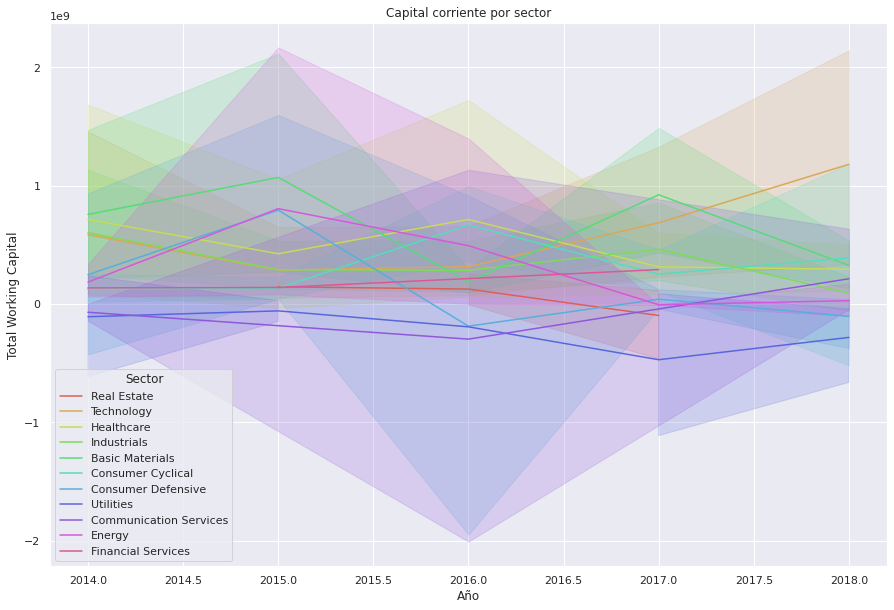

In [ ]:
plt.figure(figsize = (15, 10))
seaborn.lineplot(data = fin_cp_filt_no.sample(500, random_state = 123), x = "year", y = "WC audit",
             hue = "Sector", palette = seaborn.color_palette("hls", 11))
plt.title("Capital corriente por sector")
plt.xlabel("Año")
plt.ylabel("Total Working Capital")
plt.show()

In [ ]:
# Empresas con riesgo de solvencia financiera a Corto Plazo:

fin_problems = fin_cp_filt_no[["ticker", "Sector", "WC audit"]]

In [ ]:
fin_problems[fin_problems['WC audit']< 0] #Tenemos 2149 empresas con riesgo de solvencia financiera a CP. 

ticker              Sector          WC audit
0         PG  Consumer Defensive -2,109,000,000.00
2         KR  Consumer Defensive -1,875,000,000.00
4        GIS  Consumer Defensive -1,030,000,000.00
7        WMT  Consumer Defensive -8,160,000,000.00
8       MDLZ  Consumer Defensive -2,257,000,000.00
...      ...                 ...               ...
22018   TMSR         Industrials     -3,684,176.00
22021   TRCH              Energy       -676,690.00
22031   UAMY     Basic Materials     -1,614,362.00
22062   WRLS         Industrials     -2,124,586.00
22068   XBIO          Healthcare       -405,817.00

[2149 rows x 3 columns]

**Situacion Financiera a Largo Plazo** 

Se analiza la capacidad que tiene la empresa para pagar las deudas comprometidas. 

In [ ]:
financial_lp_columns = ['ticker', 'year','Sector','Total shareholders equity', 'Total assets',
                     'Total liabilities', 'Total non-current assets','Total non-current liabilities', 'totalDebtToCapitalization', 'Debt to Equity']

El ratio endeudamiento "Total debt to capitalization" se calculo como el Patrimonio Neto dividido el Pasivo. Este indicador nos demuestra que tan endeudada se encuentra la empresa respecto a su patrimonio. Como primer paso, verificaremos que el data set efectivamente nos indique esta informacion. 

In [ ]:
financial_lp = df_financial_ic[financial_lp_columns]
financial_lp.head()

ticker  year              Sector  Total shareholders equity  \
0     PG  2014  Consumer Defensive          69,976,000,000.00   
1   VIPS  2014  Consumer Defensive             412,354,536.65   
2     KR  2014  Consumer Defensive           5,384,000,000.00   
3    RAD  2014  Consumer Defensive          -2,113,702,000.00   
4    GIS  2014  Consumer Defensive           6,534,800,000.00   

        Total assets  Total liabilities  Total non-current assets  \
0 144,266,000,000.00  74,290,000,000.00        112,649,000,000.00   
1   2,736,687,278.01   2,301,093,477.56            602,290,442.36   
2  29,281,000,000.00  23,886,000,000.00         20,451,000,000.00   
3   6,944,871,000.00   9,058,573,000.00          2,659,746,000.00   
4  23,145,700,000.00  15,156,200,000.00         18,752,200,000.00   

   Total non-current liabilities  totalDebtToCapitalization  Debt to Equity  
0              40,564,000,000.00                       0.34            0.51  
1                 661,556,667.74                       0.60            1.51  
2              13,181,000,000.00                       0.68            2.10  
3               6,551,121,000.00                       1.58           -2.72  
4               9,732,700,000.00                       0.57            1.34

In [ ]:
financial_lp['E/L'] =  financial_lp['Total shareholders equity'] / financial_lp['Total liabilities']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
financial_lp.head(20)

ticker  year              Sector  Total shareholders equity  \
0      PG  2014  Consumer Defensive          69,976,000,000.00   
1    VIPS  2014  Consumer Defensive             412,354,536.65   
2      KR  2014  Consumer Defensive           5,384,000,000.00   
3     RAD  2014  Consumer Defensive          -2,113,702,000.00   
4     GIS  2014  Consumer Defensive           6,534,800,000.00   
5      PM  2014  Consumer Defensive         -12,629,000,000.00   
6      KO  2014  Consumer Defensive          30,320,000,000.00   
7     WMT  2014  Consumer Defensive          76,255,000,000.00   
8    MDLZ  2014  Consumer Defensive          27,750,000,000.00   
9      MO  2014  Consumer Defensive           3,014,000,000.00   
10   ABEV  2014  Consumer Defensive          15,854,900,488.17   
11    TAL  2014  Consumer Defensive             259,996,401.00   
12   BRFS  2014  Consumer Defensive           5,854,449,868.57   
13    KHC  2014  Consumer Defensive           7,117,000,000.00   
14    NWL  2014  Consumer Defensive           1,851,400,000.00   
15    KMB  2014  Consumer Defensive             729,000,000.00   
16    CPB  2014  Consumer Defensive           1,615,000,000.00   
17    TGT  2014  Consumer Defensive          16,231,000,000.00   
18    HRL  2014  Consumer Defensive           3,605,678,000.00   
19    CAG  2014  Consumer Defensive           5,258,500,000.00   

         Total assets  Total liabilities  Total non-current assets  \
0  144,266,000,000.00  74,290,000,000.00        112,649,000,000.00   
1    2,736,687,278.01   2,301,093,477.56            602,290,442.36   
2   29,281,000,000.00  23,886,000,000.00         20,451,000,000.00   
3    6,944,871,000.00   9,058,573,000.00          2,659,746,000.00   
4   23,145,700,000.00  15,156,200,000.00         18,752,200,000.00   
5   35,187,000,000.00  46,390,000,000.00         19,703,000,000.00   
6   92,023,000,000.00  61,462,000,000.00         59,037,000,000.00   
7  204,751,000,000.00 123,412,000,000.00        143,566,000,000.00   
8   66,771,000,000.00  38,918,000,000.00         55,021,000,000.00   
9   34,475,000,000.00  31,430,000,000.00         27,597,000,000.00   
10  27,090,987,607.96  10,701,689,823.51         19,307,097,258.73   
11     427,598,767.00     167,602,366.00            127,222,145.00   
12  13,557,529,102.52   7,665,715,358.62          6,990,386,781.82   
13  36,571,000,000.00  20,886,000,000.00         31,656,000,000.00   
14   6,564,300,000.00   4,709,400,000.00          4,272,100,000.00   
15  15,526,000,000.00  14,527,000,000.00          9,967,000,000.00   
16   8,113,000,000.00   6,510,000,000.00          6,013,000,000.00   
17  44,553,000,000.00  28,322,000,000.00         32,980,000,000.00   
18   5,455,619,000.00   1,843,563,000.00          3,322,848,000.00   
19  19,319,500,000.00  13,964,300,000.00         15,088,700,000.00   

    Total non-current liabilities  totalDebtToCapitalization  Debt to Equity  \
0               40,564,000,000.00                       0.34            0.51   
1                  661,556,667.74                       0.60            1.51   
2               13,181,000,000.00                       0.68            2.10   
3                6,551,121,000.00                       1.58           -2.72   
4                9,732,700,000.00                       0.57            1.34   
5               31,278,000,000.00                       1.75           -2.33   
6               29,088,000,000.00                       0.58            1.38   
7               54,067,000,000.00                       0.43            0.74   
8               24,911,000,000.00                       0.38            0.60   
9               23,757,000,000.00                       0.83            4.87   
10               2,506,120,916.26                       0.06            0.06   
11                     846,040.00                       0.00            0.00   
12               4,072,361,997.75                       0.44            0.79   
13              17,794,00

In [ ]:
financial_lp["control"] = financial_lp['Debt to Equity'] == financial_lp['E/L']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
financial_lp[financial_lp['control']== True].count() #solo tenemos 9 valores que coinciden con la formula, por lo que consideramos valida la calculada. 

ticker                           9
year                             9
Sector                           9
Total shareholders equity        9
Total assets                     9
Total liabilities                9
Total non-current assets         6
Total non-current liabilities    6
totalDebtToCapitalization        6
Debt to Equity                   9
E/L                              9
control                          9
dtype: int64

Otro indicador clave para la situacion financiera a largo plazo. Es que los activos no corrientes esten financiados con Patrimonio Neto o Pasivos de Largo Plazo. 
El indicador se calcula como Non current assets / (non current assets + Equity)

In [ ]:
financial_lp['Long term assets'] = financial_lp['Total assets'] / (financial_lp['Total shareholders equity'] + financial_lp['Total non-current liabilities'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
status(financial_lp)

variable  q_nan  p_nan  q_zeros  p_zeros  unique  \
0                          ticker      0   0.00        0     0.00    4980   
1                            year      0   0.00        0     0.00       5   
2                          Sector      0   0.00        0     0.00      11   
3       Total shareholders equity   1372   0.06       57     0.00   20069   
4                    Total assets   1305   0.06       32     0.00   20396   
5               Total liabilities   1396   0.06       52     0.00   20193   
6        Total non-current assets   6022   0.27       82     0.00   15593   
7   Total non-current liabilities   6036   0.27      786     0.04   14631   
8       totalDebtToCapitalization   2292   0.10     4197     0.19   15355   
9                  Debt to Equity   2314   0.10     3502     0.16   11930   
10                            E/L   1421   0.06       31     0.00   20460   
11                        control      0   0.00    22068     1.00       2   
12               Long term assets   6049   0.27        2     0.00   15945   

       type  
0    object  
1     int64  
2    object  
3   float64  
4   float64  
5   float64  
6   float64  
7   float64  
8   float64  
9   float64  
10  float64  
11     bool  
12  float64

len before: 22077
len after: 17989


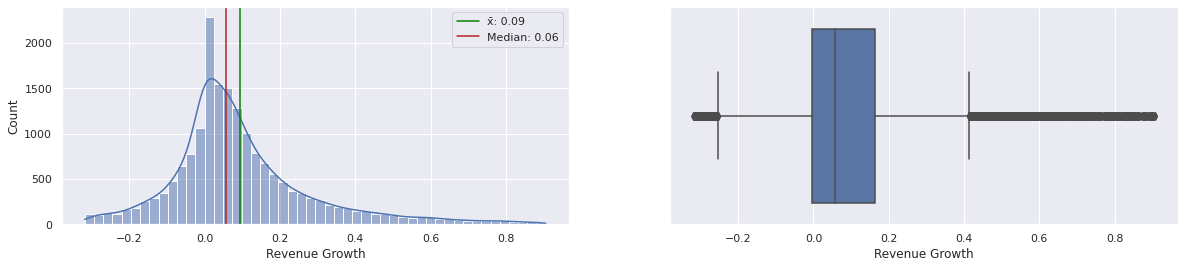

In [ ]:
df_financial_ic_woo_1 = clean_outliers(df_financial_ic, 'Revenue Growth', 0.05, 0.95)
hist_and_box(df_financial_ic_woo_1,'Revenue Growth')

Se puede intuir graficamente, por las colas, que Revenue Growth puede seguir una distribucion normal. De todas formas para asegurarnos realizaremos un test de Shapiro-Wilk para verificar normalidad.

$H_0$

Asumimos un nivel de significancia $\alpha = 0,05 $. Siempre emplearemos este nivel en todos los test de hipotesis a realizar.

In [ ]:
def test_shapiro_wilk(df_to_test,alpha = 0.05):
  n=50
  sample = df_to_test.sample(n, replace=False)
  w_shap_a, p_shap_a = st.shapiro(sample)
  print("""H0: La muestra sigue una distribución NORMAL
H1: La muestra NO sigue una distribución NORMAL""")
  print(w_shap_a, p_shap_a)
  if p_shap_a > alpha:
    print("No se puede rechazar H0")
  elif(p_shap_a < alpha):
    print("Se rechaza H0")
  else:
    return "El test no decide"

test_shapiro_wilk(df_financial_ic_woo_1['Revenue Growth'])

H0: La muestra sigue una distribución NORMAL
H1: La muestra NO sigue una distribución NORMAL
0.9125424027442932 0.0012810579501092434
Se rechaza H0


In [ ]:
df_financial_ic_woo_1['Revenue Growth'].describe()

count   17,989.00
mean         0.09
std          0.19
min         -0.32
25%         -0.00
50%          0.06
75%          0.16
max          0.91
Name: Revenue Growth, dtype: float64

####**2.** Gross Profit:

El *Revenue Growth* o crecimiento de los ingresos se refiere a un aumento en los ingresos durante un período de tiempo.

**Revenue Growth** = Current Period Revenue - Prior Period revenue) / Prior period revenue

**Distribucion con outliers**

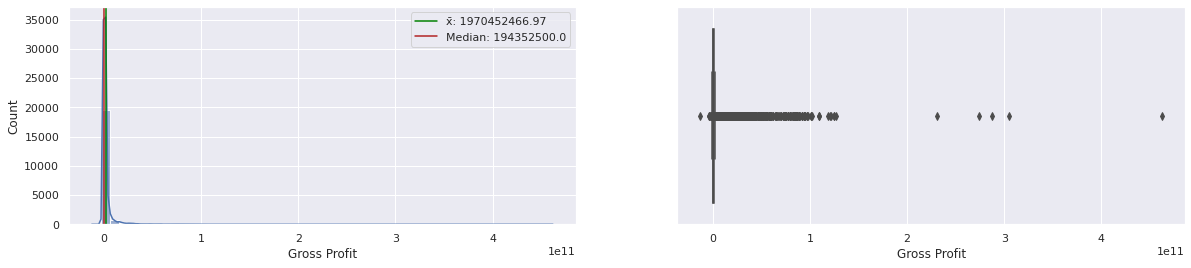

In [ ]:
hist_and_box(df_financial_ic,'Gross Profit')

**Distribucion sin outliers**

len before: 22077
len after: 18491


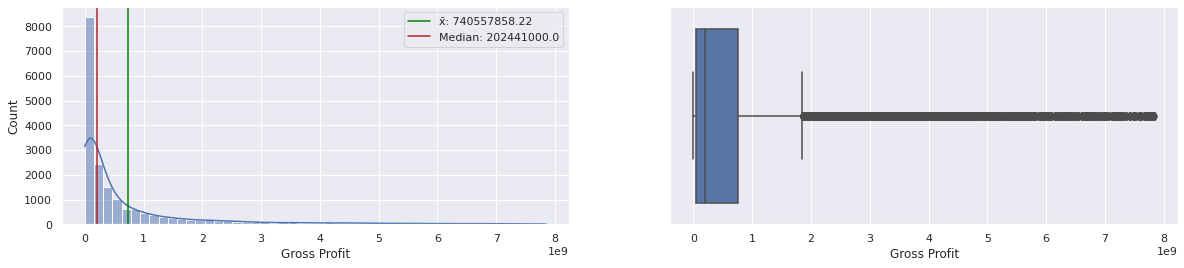

In [ ]:
df_financial_ic_woo_2 = clean_outliers(df_financial_ic, 'Gross Profit', 0.05, 0.95)
hist_and_box(df_financial_ic_woo_2,'Gross Profit')

Se puede intuir graficamente, por las colas, que Gross Profit puede seguir una distribucion exponencial. De todas formas para asegurarnos realizaremos un test para verificarlo.

$H_0$

Asumimos un nivel de significancia $\alpha = 0,05 $, que de aquí en adelante se empleará en todos los test de hipotesis a realizar.

In [ ]:
df_financial_ic_woo_2['Gross Profit'].describe()

count          18,491.00
mean      740,557,858.22
std     1,312,131,303.55
min             1,000.00
25%        41,260,500.00
50%       202,441,000.00
75%       761,445,000.00
max     7,846,000,000.00
Name: Gross Profit, dtype: float64

####**3.** Current Ratio:

El *Current Ratio* es un ratio de liquidez que mide la capacidad de una empresa para pagar obligaciones a corto plazo.

**Current Ratio** = Activo corriente / Pasivo corriente.

**Distribucion con outliers**

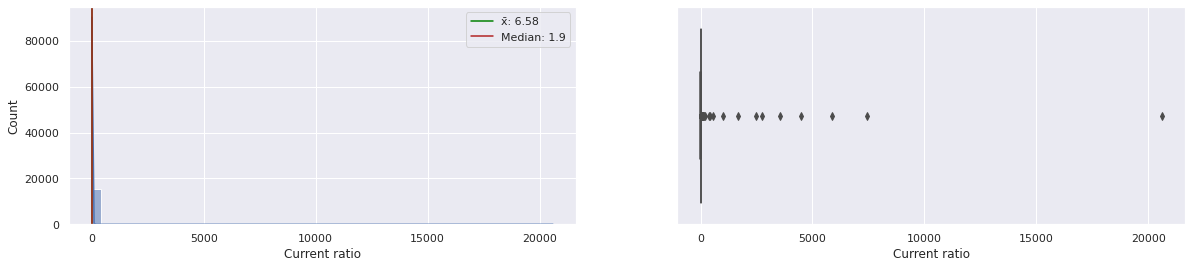

In [ ]:
hist_and_box(df_financial_ic,'Current ratio')

**Distribucion sin outliers**

len before: 22077
len after: 14003


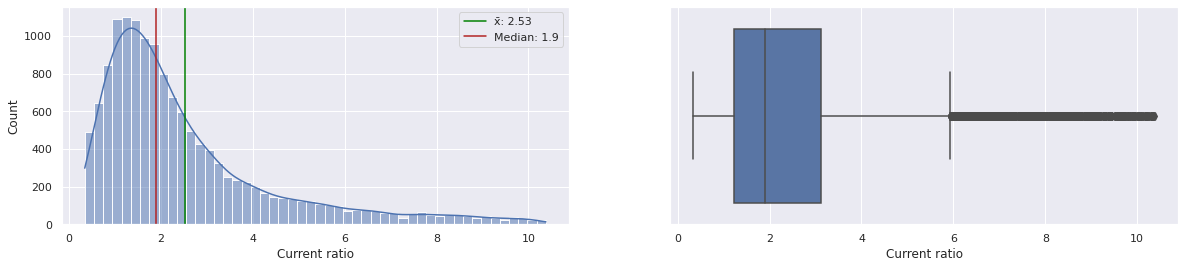

In [ ]:
df_financial_ic_woo_3 = clean_outliers(df_financial_ic, 'Current ratio', 0.05, 0.95)
hist_and_box(df_financial_ic_woo_3,'Current ratio')

Se puede intuir graficamente, por las colas, que *Current Ratio* puede seguir una distribucion. De todas formas para asegurarnos realizaremos un test para verificarlo.

$H_0$

Asumimos un nivel de significancia $\alpha = 0,05 $, que de aquí en adelante se empleará en todos los test de hipotesis a realizar.

In [ ]:
df_financial_ic_woo_3['Current ratio'].describe()

count   14,003.00
mean         2.53
std          1.95
min          0.34
25%          1.23
50%          1.90
75%          3.11
max         10.38
Name: Current ratio, dtype: float64

####**4.** Working Capital:

El *Working Capital* o capital de trabajo es la diferencia entre los activos corrientes de una empresa y sus pasivos corrientes. Es una medida de la liquidez y vemos la salud financiera a corto plazo de una empresa. 

Nos interesa incluírla en el análisis porque si una empresa tiene un WC positivo sustancial, entonces debe tener el potencial de invertir y crecer. 

**Working Capital** = Activo Corriente - Pasivo Corriente

**Distribucion con outliers**

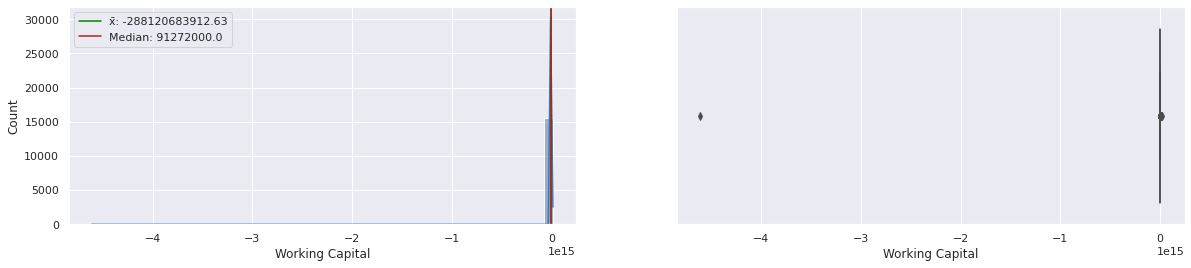

In [ ]:
hist_and_box(df_financial_ic,'Working Capital')

**Distribucion sin outliers**

len before: 22077
len after: 14009


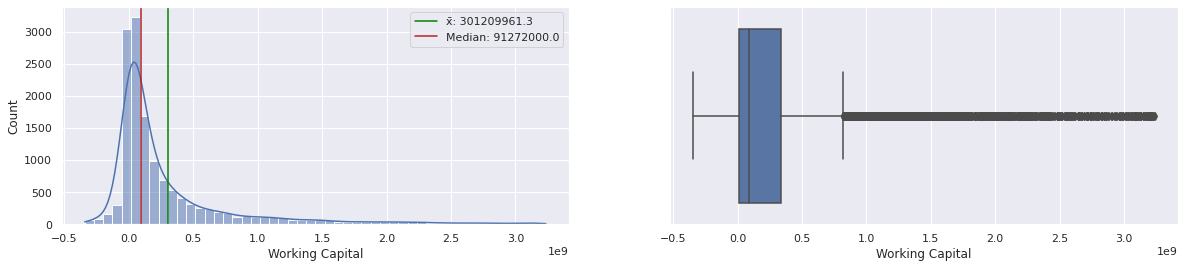

In [ ]:
df_financial_ic_woo_4 = clean_outliers(df_financial_ic, 'Working Capital', 0.05, 0.95)
hist_and_box(df_financial_ic_woo_4,'Working Capital')

Se puede intuir graficamente, por las colas, que Gross Profit puede seguir una distribucion . De todas formas para asegurarnos realizaremos un test para verificarlo.

$H_0$

Asumimos un nivel de significancia $\alpha = 0,05 $, que de aquí en adelante se empleará en todos los test de hipotesis a realizar.

In [ ]:
df_financial_ic_woo_4['Working Capital'].describe()

count          14,009.00
mean      301,209,961.30
std       538,186,535.59
min      -341,950,000.00
25%        14,203,000.00
50%        91,272,000.00
75%       335,100,000.00
max     3,237,000,000.00
Name: Working Capital, dtype: float64

####**5.** Net Profit Margin:

El *Net Profit Margin*, o margen de beneficio, es una medida de la rentabilidad. Mide la cantidad de ganancias que se generan como porcentaje de los ingresos

**Net Profit Margin** = Beneficio Neto / Ingreso

**Distribucion con outliers**

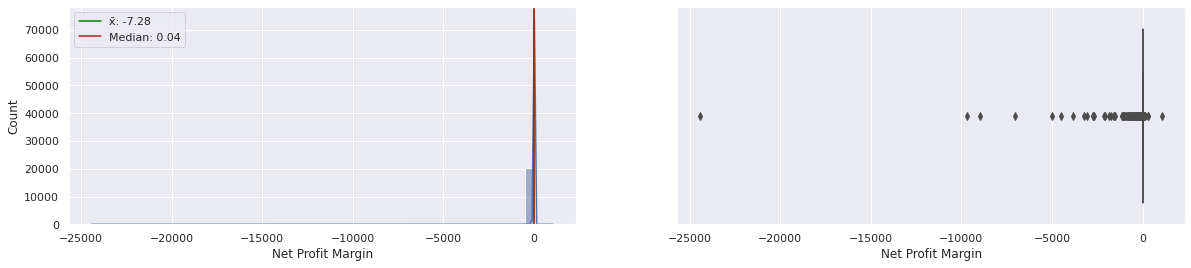

In [ ]:
hist_and_box(df_financial_ic,'Net Profit Margin')

**Distribucion sin outliers**

len before: 22077
len after: 18319


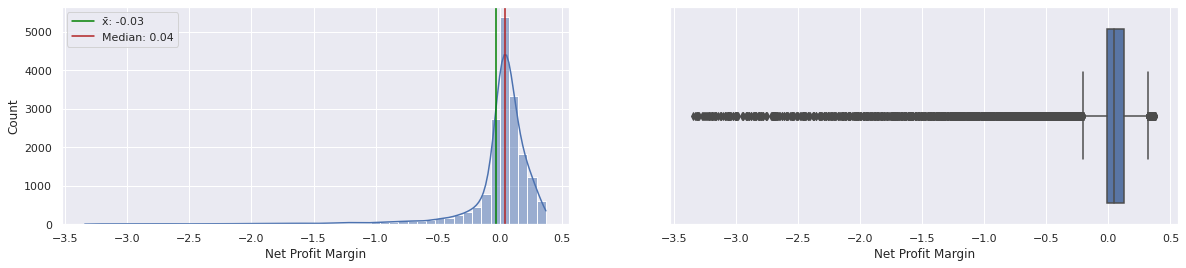

In [ ]:
df_financial_ic_woo_5 = clean_outliers(df_financial_ic, 'Net Profit Margin', 0.05, 0.95)
hist_and_box(df_financial_ic_woo_5,'Net Profit Margin')

Se puede intuir graficamente, por las colas, que Net Profit Margin puede seguir una distribucion normal. De todas formas para asegurarnos realizaremos un test de Shapiro-Wilk para verificar normalidad.

H0 

Asumimos un nivel de significancia  α=0,05 . Siempre emplearemos este nivel en todos los test de hipotesis a realizar.

In [ ]:
test_shapiro_wilk(df_financial_ic_woo_5['Net Profit Margin'])

H0: La muestra sigue una distribución NORMAL
H1: La muestra NO sigue una distribución NORMAL
0.46665042638778687 3.170879791375425e-12
Se rechaza H0


In [ ]:
df_financial_ic_woo_5['Net Profit Margin'].describe()

count   18,319.00
mean        -0.03
std          0.41
min         -3.34
25%         -0.01
50%          0.04
75%          0.12
max          0.37
Name: Net Profit Margin, dtype: float64

####**6.** priceToSalesRatio:

El *priceToSalesRatio*, o relación precio ventas, es una métrica de valoración para las acciones.

**priceToSalesRatio** = Capitalización de mercado / Ingresos

**Distribucion con outliers**

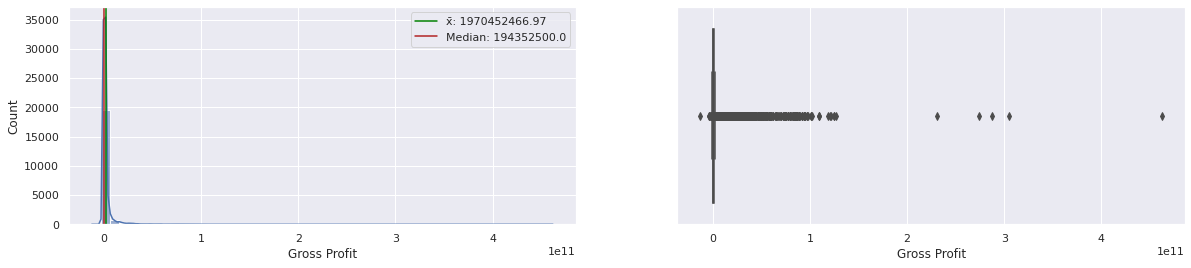

In [ ]:
hist_and_box(df_financial_ic,'Gross Profit')

**Distribucion sin outliers**

len before: 22077
len after: 18491


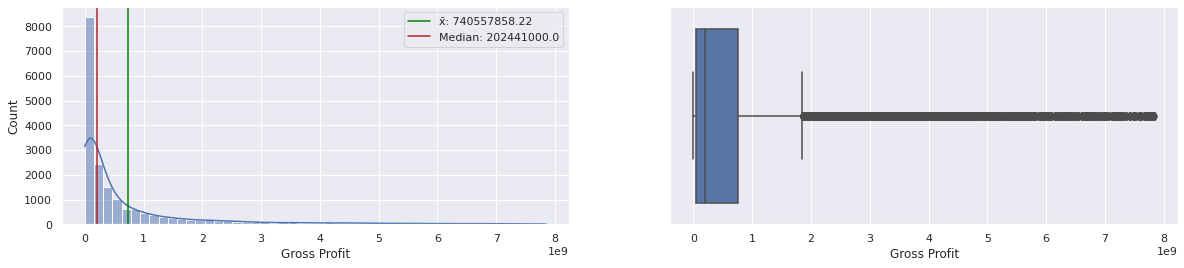

In [ ]:
df_financial_ic_woo_2 = clean_outliers(df_financial_ic, 'Gross Profit', 0.05, 0.95)
hist_and_box(df_financial_ic_woo_2,'Gross Profit')

Se puede intuir graficamente, por las colas, que Gross Profit puede seguir una distribucion exponencial. De todas formas para asegurarnos realizaremos un test para verificarlo.

$H_0$

Asumimos un nivel de significancia $\alpha = 0,05 $, que de aquí en adelante se empleará en todos los test de hipotesis a realizar.

In [ ]:
df_financial_ic_woo_2['Gross Profit'].describe()

count          18,491.00
mean      740,557,858.22
std     1,312,131,303.55
min             1,000.00
25%        41,260,500.00
50%       202,441,000.00
75%       761,445,000.00
max     7,846,000,000.00
Name: Gross Profit, dtype: float64

###**Graficar cantidad de registros agrupados por año**

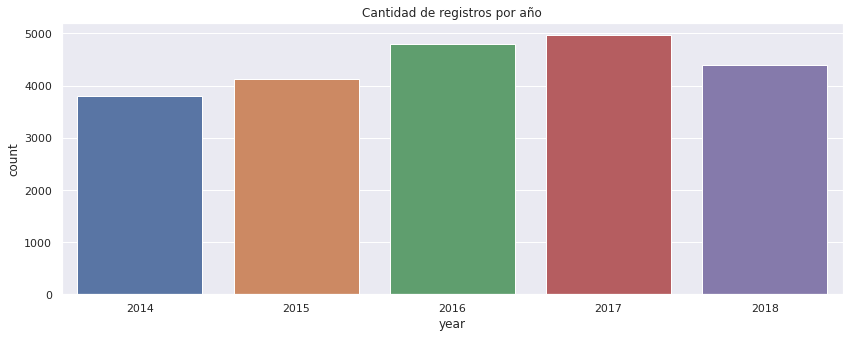

In [ ]:
fig = plt.figure(figsize=(14,5))
g = seaborn.countplot(data=df_financial, x=df_financial.year).set(title='Cantidad de registros por año')

###**Graficar cantidad de registros agrupados por sector**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

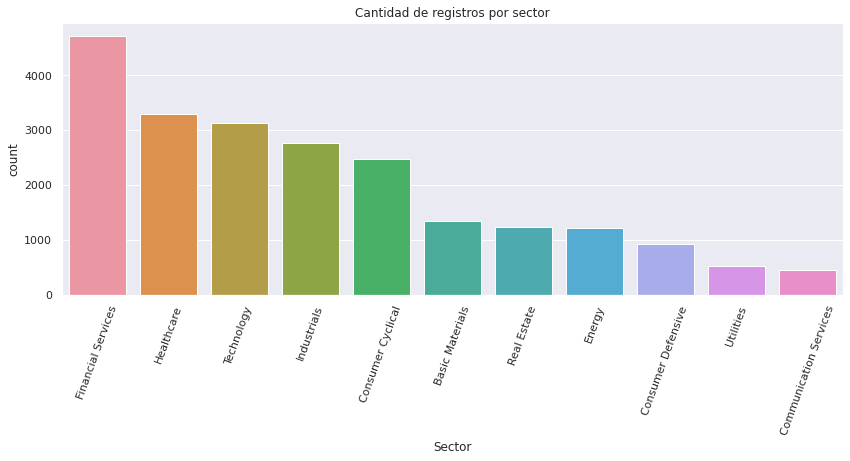

In [ ]:
fig = plt.figure(figsize=(14,5))
g = seaborn.countplot(data=df_financial, x=df_financial.Sector, order = df_financial['Sector'].value_counts().index).set(title='Cantidad de registros por sector')
# Use the pyplot interface to change just one subplot...
plt.xticks(rotation=70)

###**Distribución de PRICE VAR**

Se utiliza la columna `AnualPriceVariation`

**Distribucion con outliers**

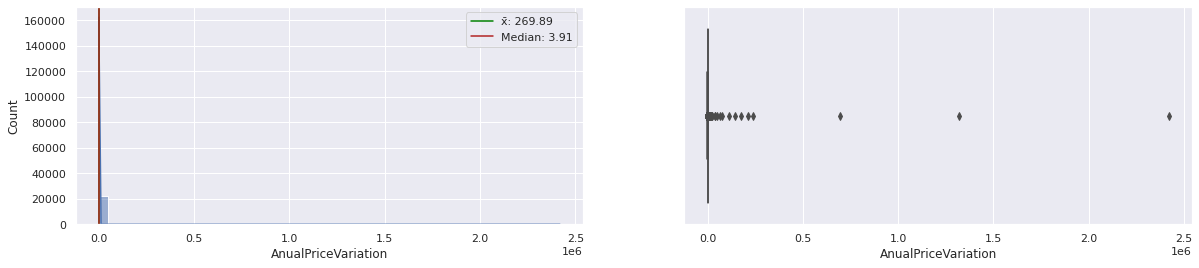

In [ ]:
hist_and_box(df_financial_ic,'AnualPriceVariation')

**Distribucion sin outliers**

len before: 22077
len after: 19869


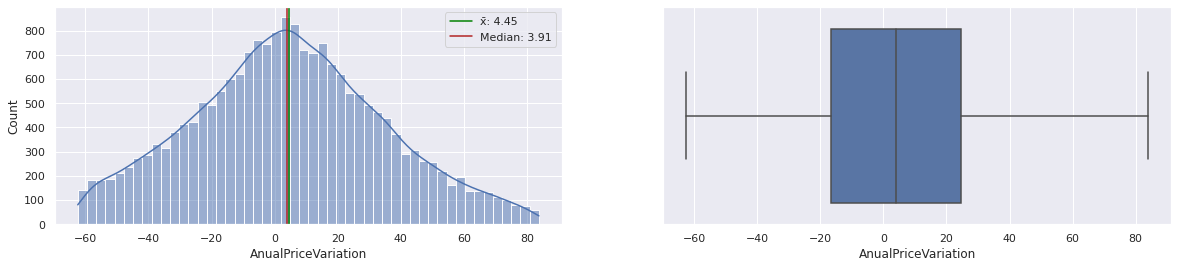

In [ ]:
df_financial_ic_woo_av = clean_outliers(df_financial_ic, 'AnualPriceVariation', 0.05, 0.95)
hist_and_box(df_financial_ic_woo_av,'AnualPriceVariation')

Se puede intuir graficamente, por las colas, que AnualPriceVariation puede seguir una distribucion normal. De todas formas para asegurarnos realizaremos un test de Shapiro-Wilk para verificar normalidad.

$H_0:$ AnualPriceVariation sigue una distribución NORMAL

$H1:$ AnualPriceVariation NO sigue una distribución NORMAL

Asumimos un nivel de significancia $\alpha = 0,05 $, que de aquí en adelante se empleará en todos los test de hipotesis a realizar.

In [ ]:
test_shapiro_wilk(df_financial_ic_woo_av['AnualPriceVariation'])

H0: La muestra sigue una distribución NORMAL
H1: La muestra NO sigue una distribución NORMAL
0.9736073017120361 0.32244476675987244
No se puede rechazar H0


In [ ]:
df_financial_ic_woo_av['AnualPriceVariation'].describe()

count   19,869.00
mean         4.45
std         30.50
min        -62.41
25%        -16.45
50%          3.91
75%         24.65
max         83.77
Name: AnualPriceVariation, dtype: float64

###**Distribución de PRICE VAR agrupados por año y por sector**

####**Distribución de PRICE VAR agrupados por año**
Se usa el df sin outliers para los graficos y analisis

In [ ]:
df_financial_ic['year'].unique()

array([2014, 2015, 2016, 2017, 2018])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


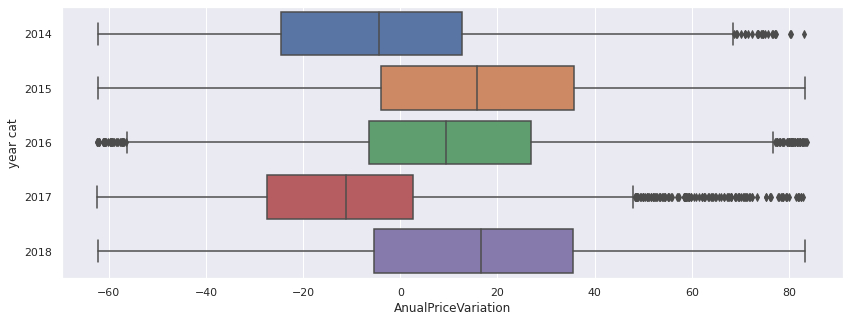

In [ ]:
#hay que convertir los años en variable categorica para poder graficar el boxplot
fig = plt.figure(figsize=(14,5))
df_financial_ic_woo_av['year cat'] = df_financial_ic_woo_av['year'].apply(str)
seaborn.boxplot(data = df_financial_ic_woo_av , x='AnualPriceVariation',y='year cat')

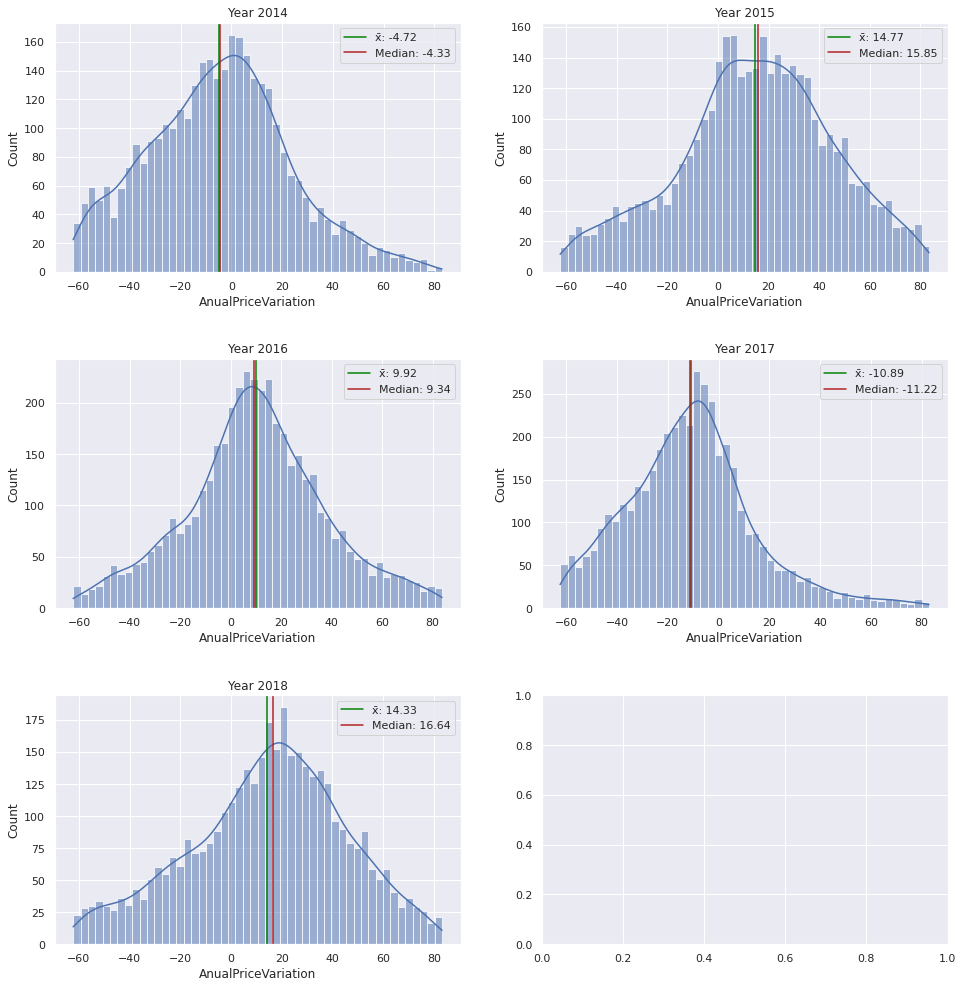

In [ ]:
long = len(df_financial_ic_woo_av['year'].unique())
row=0
col=0
fig, axes = plt.subplots(nrows= int(math.ceil(long/2)) , ncols=2 , figsize=(16,16))#maximos 2 graficos por fila
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
for year in df_financial_ic_woo_av['year'].unique():
  df_year_print = df_financial_ic_woo_av[df_financial_ic_woo_av['year'] == year]['AnualPriceVariation']
  g = seaborn.histplot(x= df_year_print, bins= 50, kde=True, ax = axes[row][col]).set(title=f'Year {year}')
  axes[row][col].axvline(x=df_year_print.mean(), color='green', label=f'x̄: {round(df_year_print.mean(),2)}')
  axes[row][col].axvline(x=df_year_print.median(), color='firebrick', label=f'Median: {round(df_year_print.median(),2)}')
  axes[row][col].legend()
  #cambio de columna y fila
  if col == 1:
    row+=1
    col=0
  else:
    col+=1

Se puede intuir graficamente, por las colas, que AnualPriceVariation en todos los años pueden seguir una distribucion normal. De todas formas para asegurarnos realizaremos un test de Shapiro-Wilk para verificar normalidad.

$H_0:$ AnualPriceVariation sigue una distribución NORMAL

$H1:$ AnualPriceVariation NO sigue una distribución NORMAL

In [ ]:
for year in df_financial_ic_woo_av['year'].unique():
  print(f"Normalidad año {year}")
  df_year_print = df_financial_ic_woo_av[df_financial_ic_woo_av['year'] == year]['AnualPriceVariation']
  test_shapiro_wilk(df_year_print)
  print(f"---------------------------------")

Normalidad año 2014
H0: La muestra sigue una distribución NORMAL
H1: La muestra NO sigue una distribución NORMAL
0.9707353115081787 0.2478846311569214
No se puede rechazar H0
---------------------------------
Normalidad año 2015
H0: La muestra sigue una distribución NORMAL
H1: La muestra NO sigue una distribución NORMAL
0.9842239618301392 0.7377975583076477
No se puede rechazar H0
---------------------------------
Normalidad año 2016
H0: La muestra sigue una distribución NORMAL
H1: La muestra NO sigue una distribución NORMAL
0.9757512807846069 0.3896663188934326
No se puede rechazar H0
---------------------------------
Normalidad año 2017
H0: La muestra sigue una distribución NORMAL
H1: La muestra NO sigue una distribución NORMAL
0.9659529328346252 0.1576986312866211
No se puede rechazar H0
---------------------------------
Normalidad año 2018
H0: La muestra sigue una distribución NORMAL
H1: La muestra NO sigue una distribución NORMAL
0.9804688096046448 0.5718975067138672
No se puede r

In [ ]:
df_financial_ic_woo_av[['AnualPriceVariation', 'year']].groupby('year').describe().round(2)

AnualPriceVariation                                              
                   count   mean   std    min    25%    50%   75%   max
year                                                                  
2014            3,482.00  -4.72 27.99 -62.30 -24.57  -4.33 12.73 83.03
2015            3,699.00  14.77 30.95 -62.32  -4.01  15.85 35.77 83.38
2016            4,341.00   9.92 27.89 -62.34  -6.42   9.34 26.87 83.77
2017            4,460.00 -10.89 25.41 -62.41 -27.48 -11.22  2.70 82.94
2018            3,887.00  14.33 30.92 -62.28  -5.35  16.64 35.53 83.24

####**Distribución de PRICE VAR agrupados por sector**
Se usa el df sin outliers para los graficos y analisis

In [ ]:
df_financial_ic['Sector'].unique()

array(['Consumer Defensive', 'Basic Materials', 'Healthcare',
       'Consumer Cyclical', 'Industrials', 'Real Estate',
       'Communication Services', 'Energy', 'Financial Services',
       'Utilities', 'Technology'], dtype=object)

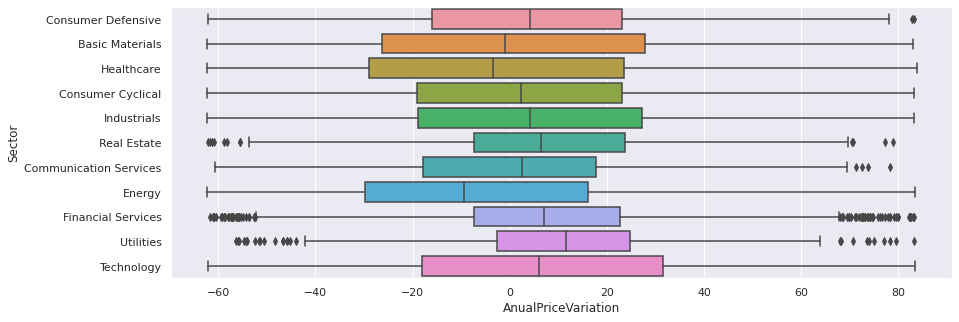

In [ ]:
fig = plt.figure(figsize=(14,5))
seaborn.boxplot(data = df_financial_ic_woo_av , x='AnualPriceVariation',y='Sector')

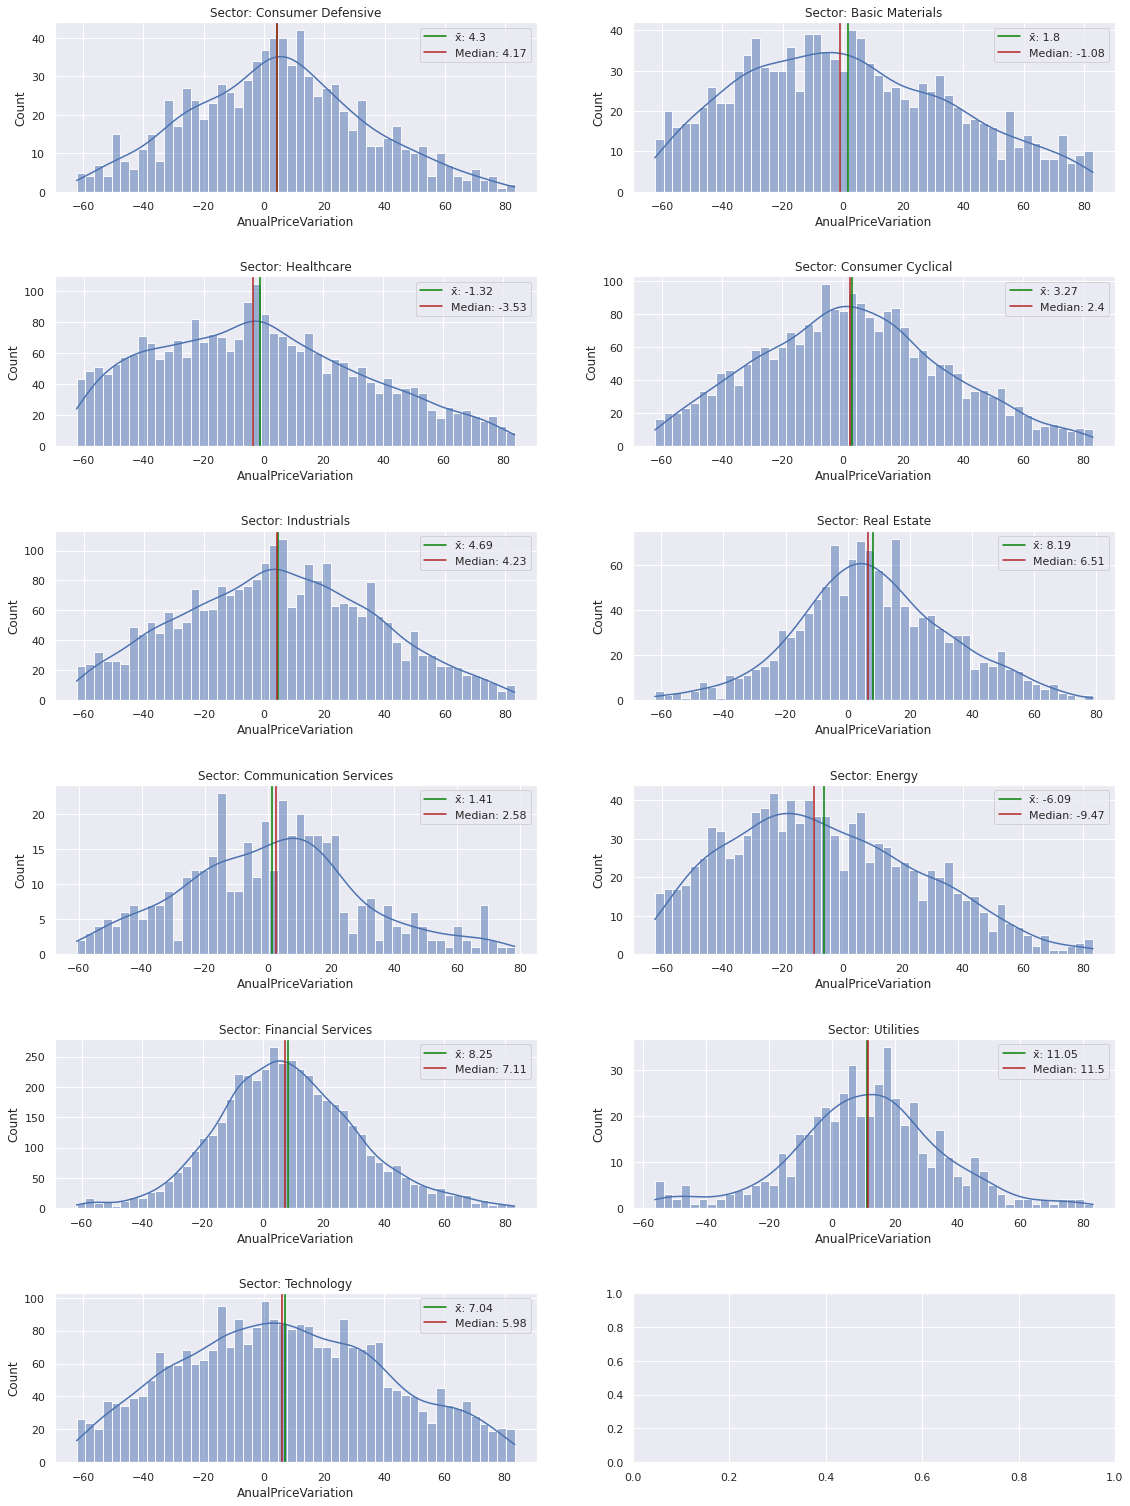

In [ ]:
long = len(df_financial_ic_woo_av['Sector'].unique())
row=0
col=0
fig, axes = plt.subplots(nrows= int(math.ceil(long/2)) , ncols=2 , figsize=(19,25))#maximos 2 graficos por fila
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
for sector in df_financial_ic_woo_av['Sector'].unique():
  df_sector_print = df_financial_ic_woo_av[df_financial_ic_woo_av['Sector'] == sector]['AnualPriceVariation']
  g = seaborn.histplot(x= df_sector_print, bins= 50, kde=True, ax = axes[row][col]).set(title=f'Sector: {sector}')
  axes[row][col].axvline(x=df_sector_print.mean(), color='green', label=f'x̄: {round(df_sector_print.mean(),2)}')
  axes[row][col].axvline(x=df_sector_print.median(), color='firebrick', label=f'Median: {round(df_sector_print.median(),2)}')
  axes[row][col].legend()
  #cambio de columna y fila
  if col == 1:
    row+=1
    col=0
  else:
    col+=1

Se puede intuir graficamente, por las colas, que AnualPriceVariation en la gran mayoria de sectores pueden seguir una distribucion normal. De todas formas para asegurarnos realizaremos un test de Shapiro-Wilk para verificar normalidad.

$H_0:$ AnualPriceVariation sigue una distribución NORMAL

$H1:$ AnualPriceVariation NO sigue una distribución NORMAL

In [ ]:
for sector in df_financial_ic_woo_av['Sector'].unique():
  print(f"Sector: {sector}")
  df_sector_print = df_financial_ic_woo_av[df_financial_ic_woo_av['Sector'] == sector]['AnualPriceVariation']
  test_shapiro_wilk(df_sector_print)
  print(f"---------------------------------")

Sector: Consumer Defensive
H0: La muestra sigue una distribución NORMAL
H1: La muestra NO sigue una distribución NORMAL
0.9830469489097595 0.6854916214942932
No se puede rechazar H0
---------------------------------
Sector: Basic Materials
H0: La muestra sigue una distribución NORMAL
H1: La muestra NO sigue una distribución NORMAL
0.9852383136749268 0.7818036675453186
No se puede rechazar H0
---------------------------------
Sector: Healthcare
H0: La muestra sigue una distribución NORMAL
H1: La muestra NO sigue una distribución NORMAL
0.9648492932319641 0.14186134934425354
No se puede rechazar H0
---------------------------------
Sector: Consumer Cyclical
H0: La muestra sigue una distribución NORMAL
H1: La muestra NO sigue una distribución NORMAL
0.9725910425186157 0.29409879446029663
No se puede rechazar H0
---------------------------------
Sector: Industrials
H0: La muestra sigue una distribución NORMAL
H1: La muestra NO sigue una distribución NORMAL
0.9799260497093201 0.548849701881

In [ ]:
df_financial_ic[['AnualPriceVariation', 'Sector']].groupby('Sector').describe().round(2)

AnualPriceVariation                                    \
                                     count     mean       std     min    25%   
Sector                                                                         
Basic Materials                   1,344.00    63.71  1,244.06  -94.71 -28.09   
Communication Services              445.00     5.31     65.82  -99.47 -19.87   
Consumer Cyclical                 2,471.00    16.14    490.05  -98.15 -21.54   
Consumer Defensive                  922.00    12.50    102.27  -97.89 -17.24   
Energy                            1,217.00    -3.02    105.45  -99.86 -36.73   
Financial Services                4,720.00   332.58 19,350.33  -99.95  -7.40   
Healthcare                        3,305.00   219.98  6,394.50 -100.40 -41.29   
Industrials                       2,768.00     7.36     47.18 -100.00 -21.57   
Real Estate                       1,241.00 1,968.77 68,656.14  -90.96  -7.35   
Technology                        3,126.00   337.48 12,756.52 -100.00 -20.85   
Utilities                           518.00    13.99     43.65  -88.24  -3.44   

                                                  
                          50%   75%          max  
Sector                                            
Basic Materials          0.86 35.97    40,233.29  
Communication Services   2.14 18.90       975.61  
Consumer Cyclical        2.35 25.75    24,166.67  
Consumer Defensive       4.64 25.67     2,292.86  
Energy                 -11.44 17.32     2,486.89  
Financial Services       7.41 23.69 1,321,280.80  
Healthcare              -5.77 29.75   238,700.00  
Industrials              4.53 30.58       582.35  
Real Estate              6.79 24.30 2,418,600.92  
Technology               7.43 37.78   695,566.67  
Utilities               11.97 26.49       523.31

###**Crear Matriz de correlación entre indicadores incluyendo PRICE VAR**

Se buscará obtener la correlacion entre todos los indicadores sin outliers

In [ ]:
interesting_indicators=['Revenue Growth','Gross Profit','Current ratio','Working Capital',
                    'Net cash flow / Change in cash','priceToSalesRatio','Net Profit Margin',
                     'AnualPriceVariation']
df_corr = df_financial_ic_woo_av[interesting_indicators].corr()
df_corr

Revenue Growth  Gross Profit  Current ratio  \
Revenue Growth                            1.00         -0.00           0.01   
Gross Profit                             -0.00          1.00          -0.01   
Current ratio                             0.01         -0.01           1.00   
Working Capital                          -0.00          0.03          -0.00   
Net cash flow / Change in cash           -0.00          0.00          -0.00   
priceToSalesRatio                        -0.00         -0.01           0.03   
Net Profit Margin                         0.00          0.01          -0.03   
AnualPriceVariation                      -0.01          0.02          -0.00   

                                Working Capital  \
Revenue Growth                            -0.00   
Gross Profit                               0.03   
Current ratio                             -0.00   
Working Capital                            1.00   
Net cash flow / Change in cash             0.00   
priceToSalesRatio                         -0.00   
Net Profit Margin                          0.00   
AnualPriceVariation                        0.01   

                                Net cash flow / Change in cash  \
Revenue Growth                                           -0.00   
Gross Profit                                              0.00   
Current ratio                                            -0.00   
Working Capital                                           0.00   
Net cash flow / Change in cash                            1.00   
priceToSalesRatio                                        -0.00   
Net Profit Margin                                         0.00   
AnualPriceVariation                                       0.00   

                                priceToSalesRatio  Net Profit Margin  \
Revenue Growth                              -0.00               0.00   
Gross Profit                                -0.01               0.01   
Current ratio                                0.03              -0.03   
Working Capital                             -0.00               0.00   
Net cash flow / Change in cash              -0.00               0.00   
priceToSalesRatio                            1.00              -0.73   
Net Profit Margin                           -0.73               1.00   
AnualPriceVariation                         -0.01               0.01   

                                AnualPriceVariation  
Revenue Growth                                -0.01  
Gross Profit                                   0.02  
Current ratio                                 -0.00  
Working Capital                                0.01  
Net cash flow / Change in cash                 0.00  
priceToSalesRatio                             -0.01  
Net Profit Margin                              0.01  
AnualPriceVariation                            1.00

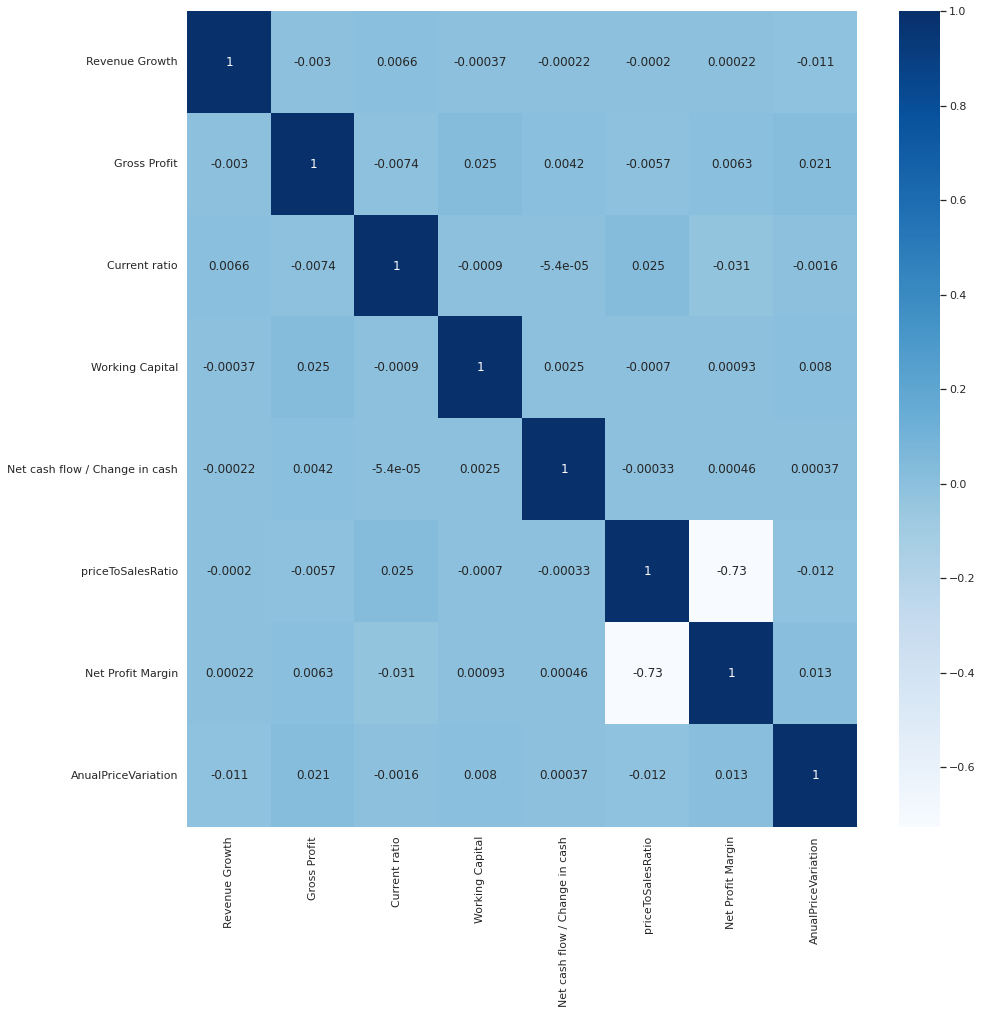

In [ ]:
plt.figure(figsize=(15, 15))
seaborn.heatmap(df_financial_ic_woo_av[interesting_indicators].corr(), annot=True,cmap='Blues')

###**Realizar scatterplots de pares de indicadores para ver su correlacion**

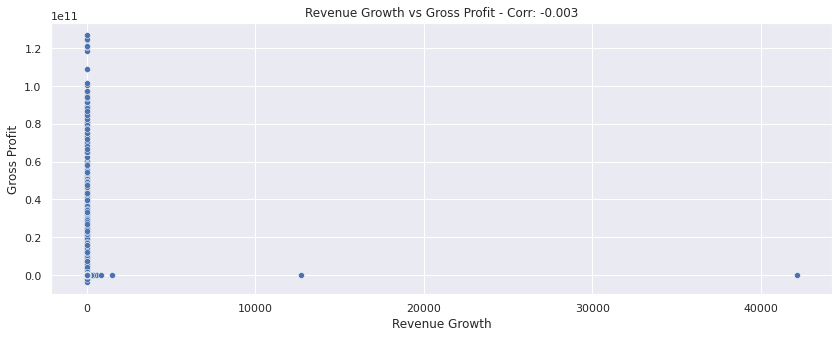

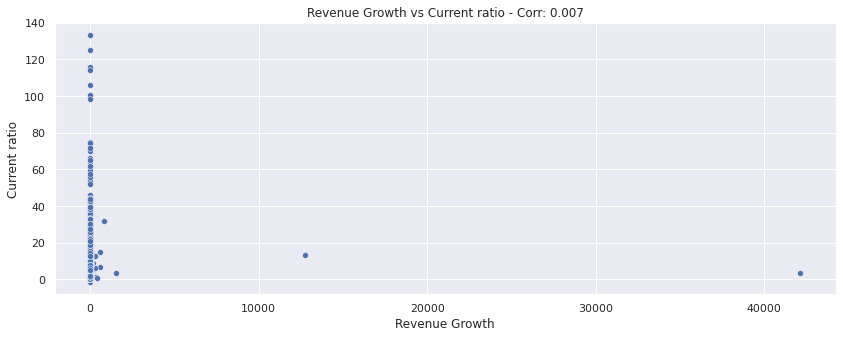

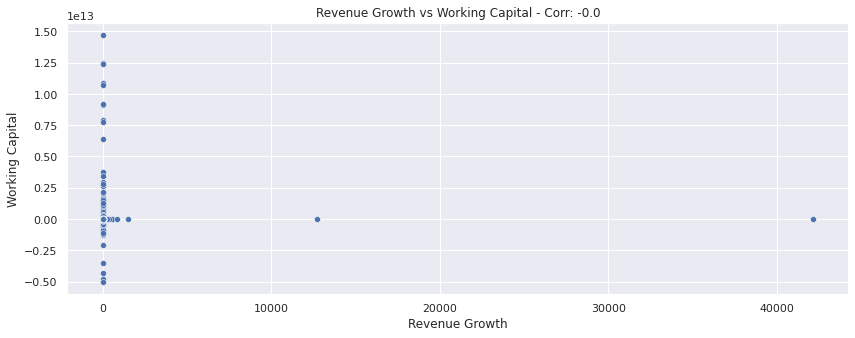

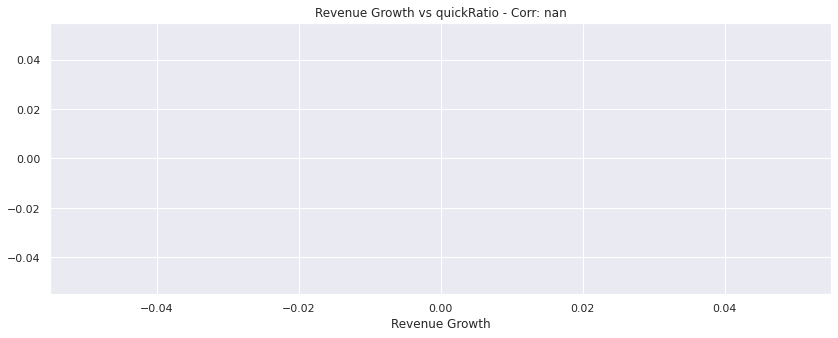

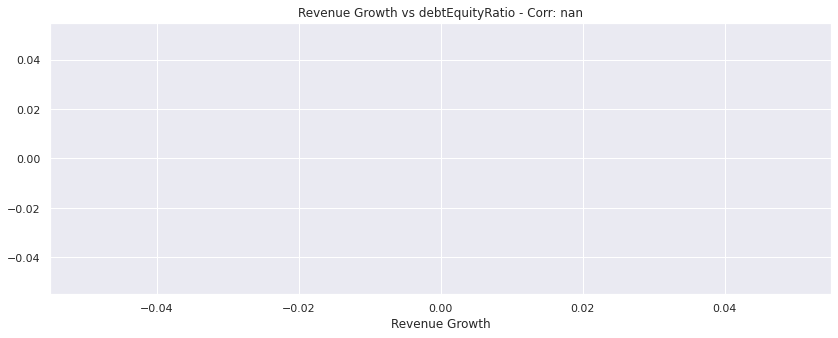

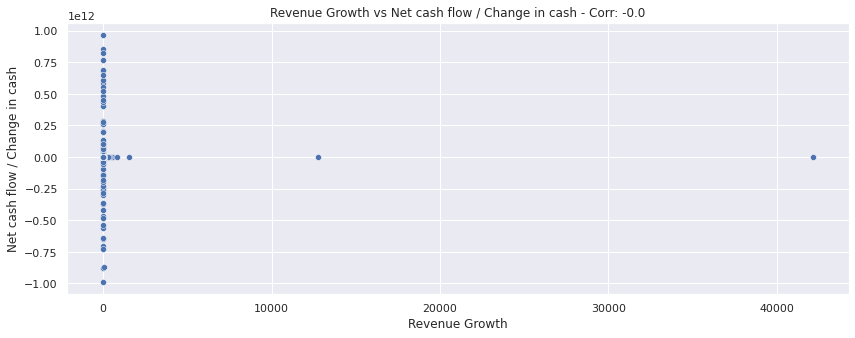

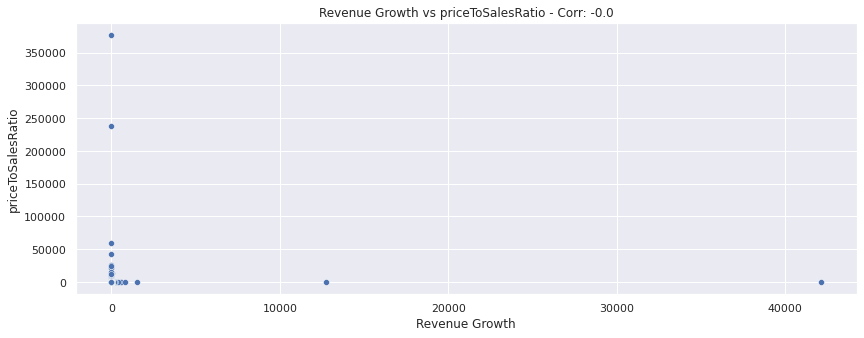

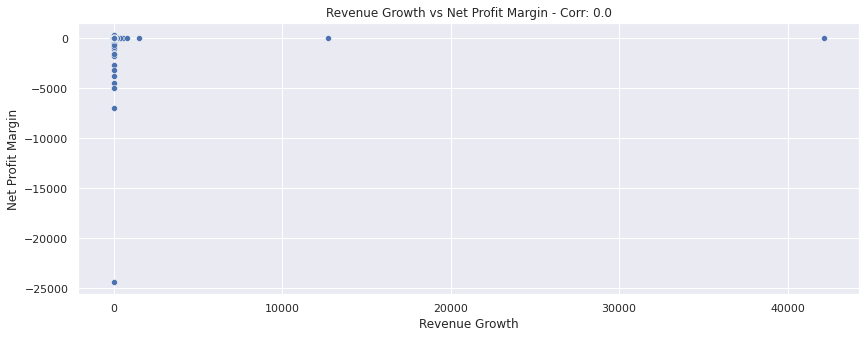

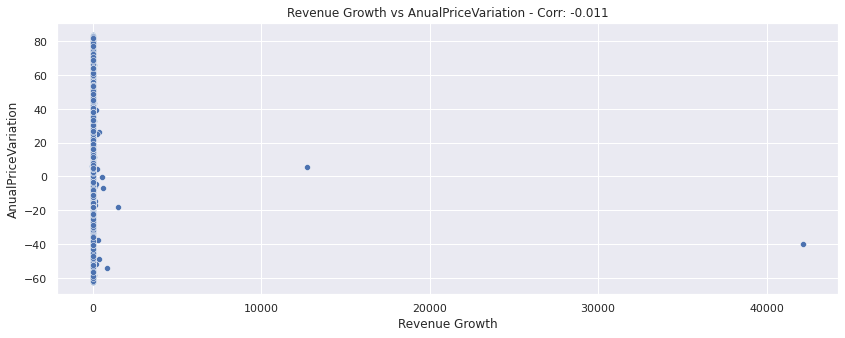

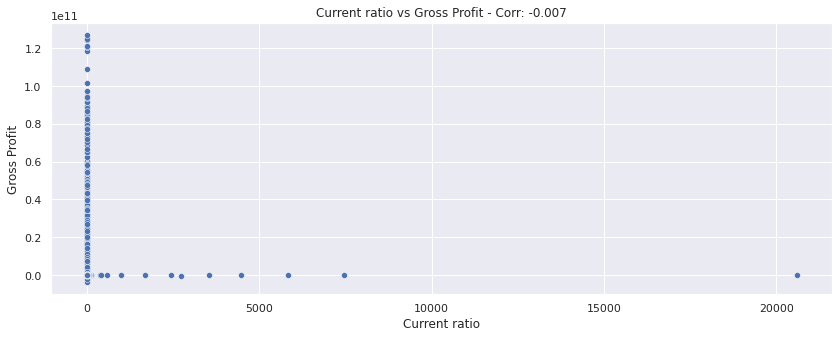

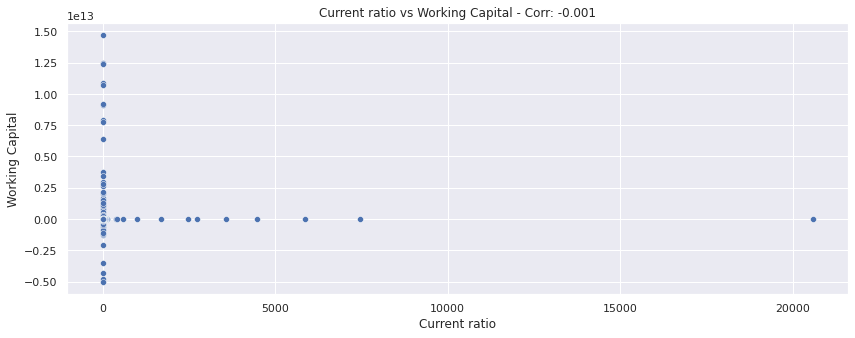

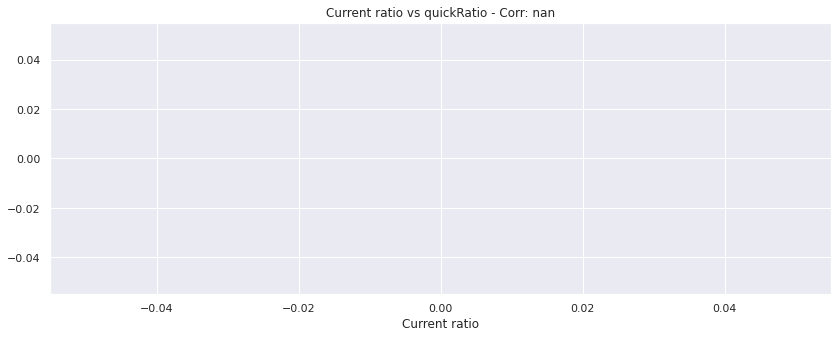

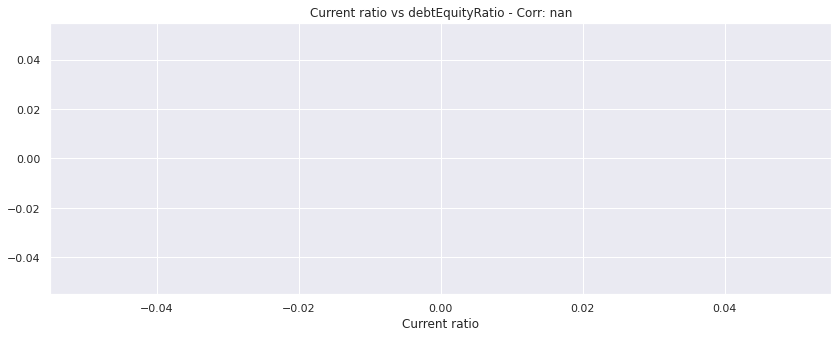

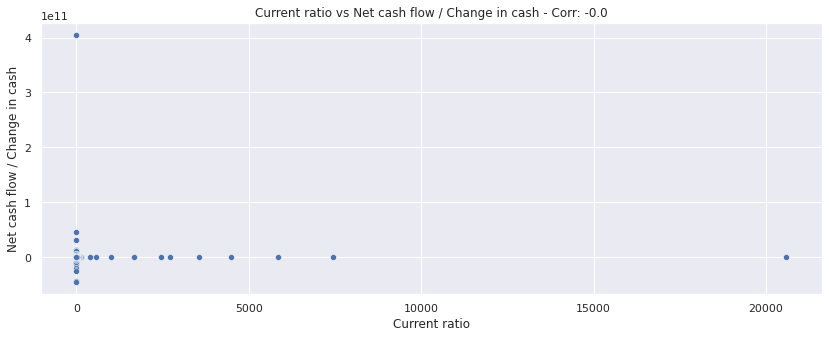

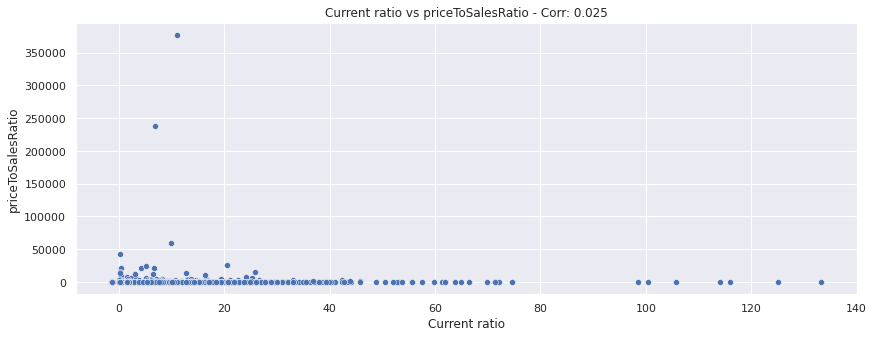

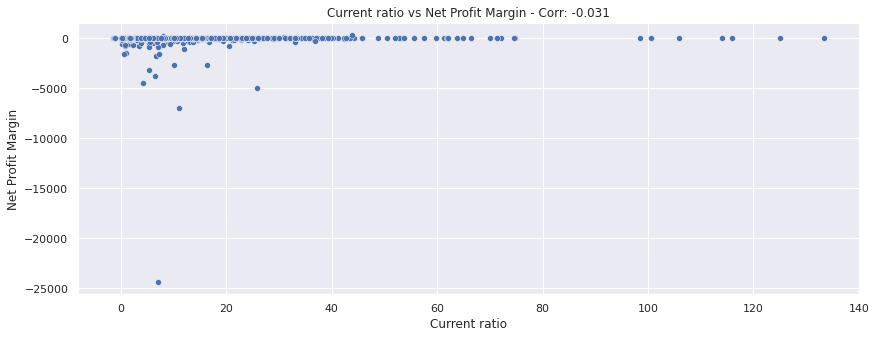

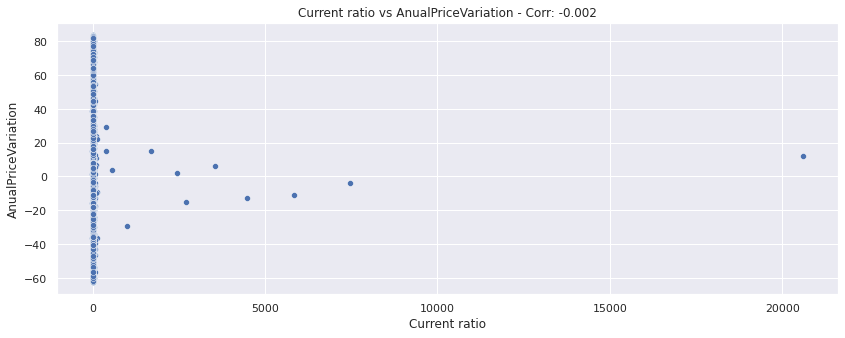

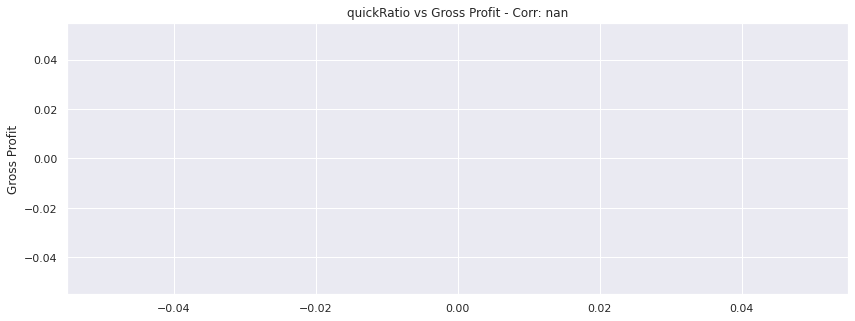

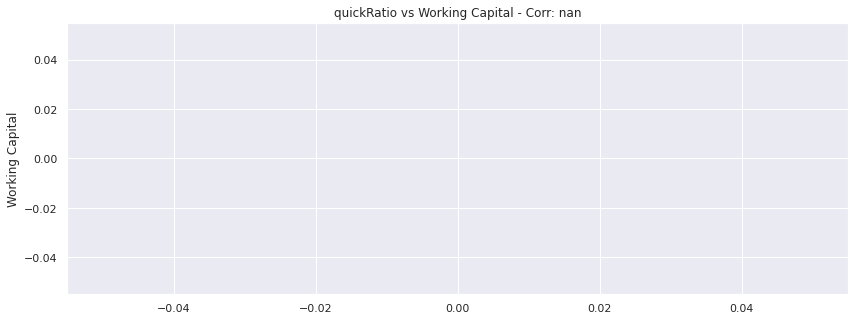

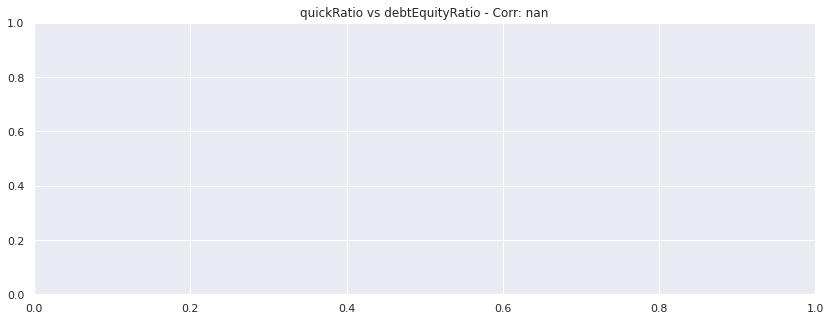

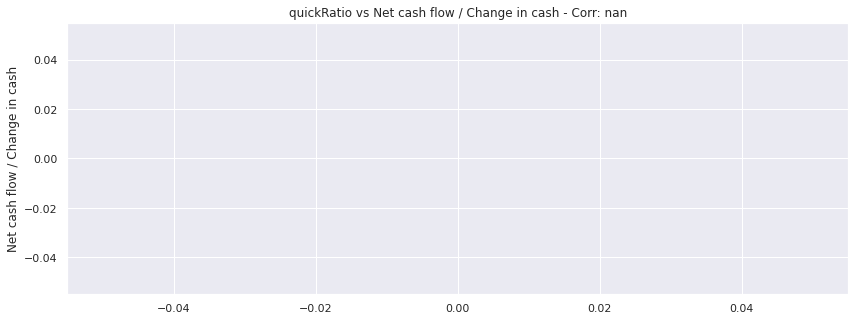

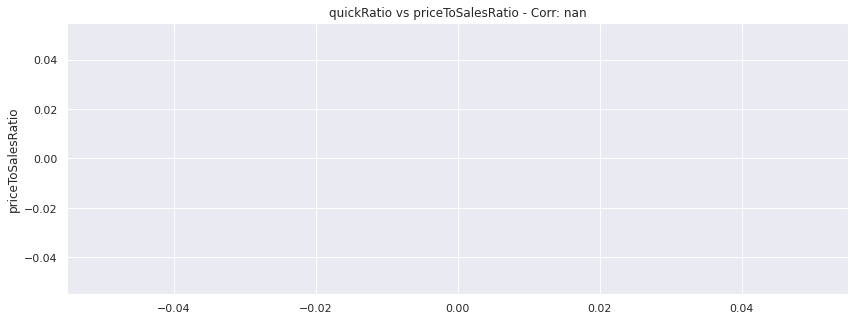

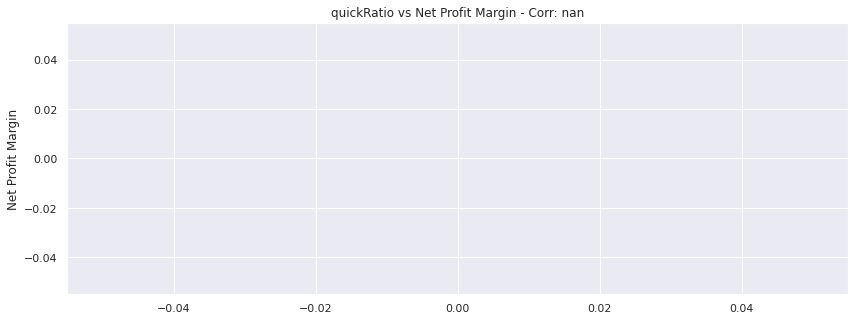

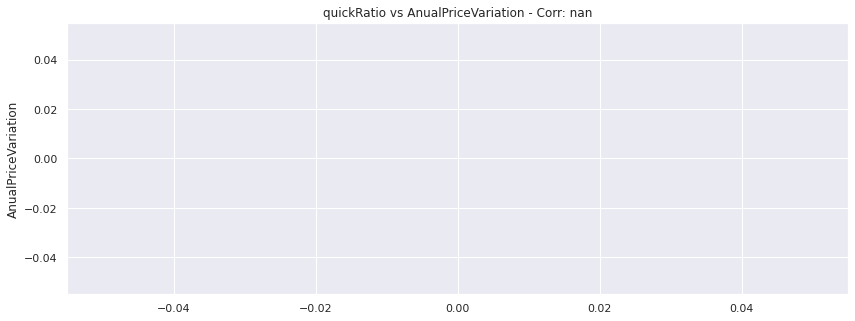

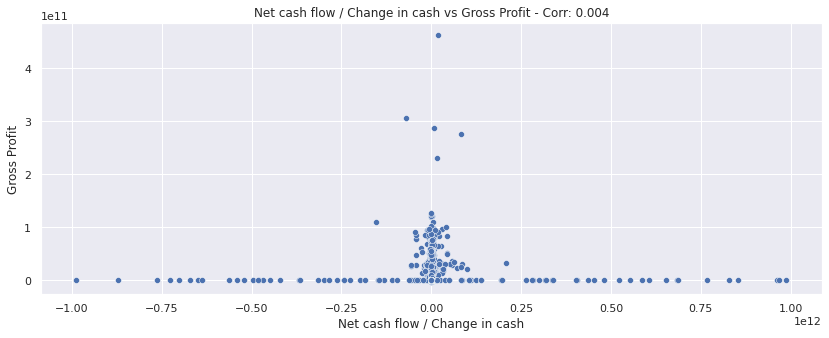

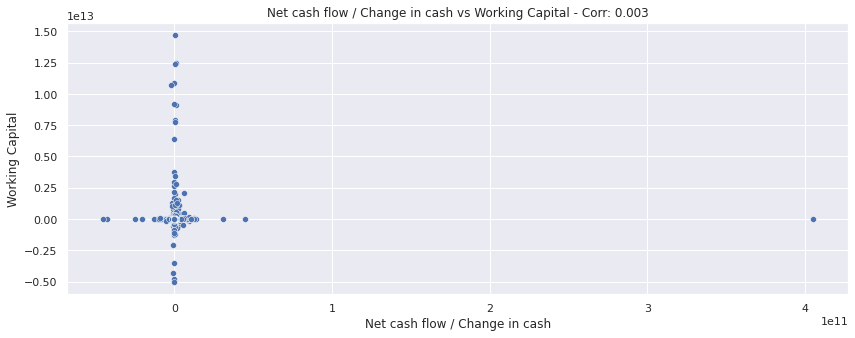

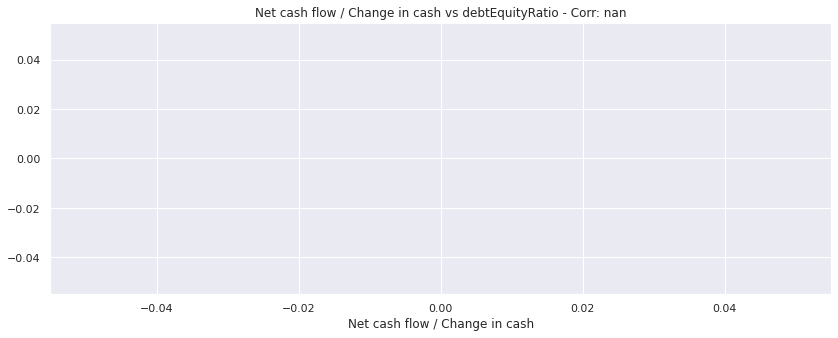

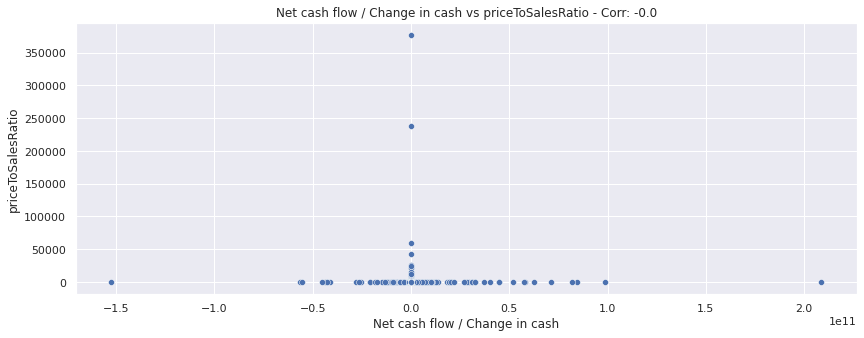

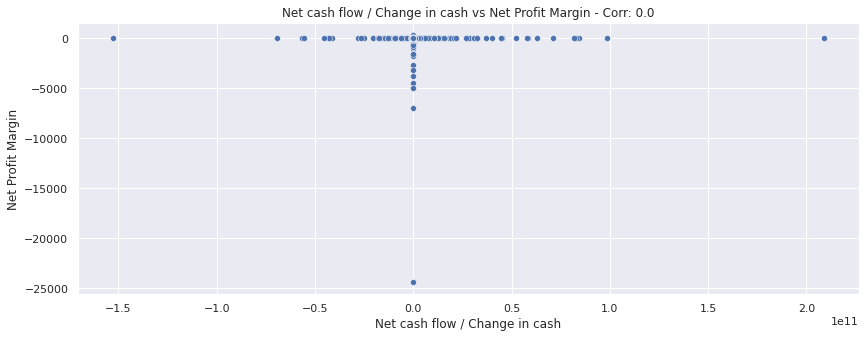

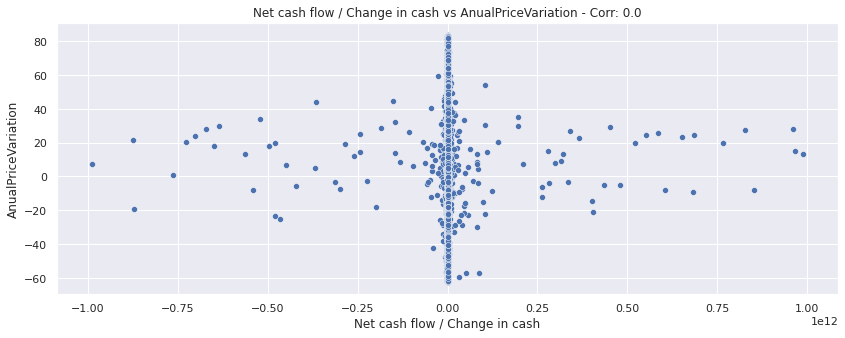

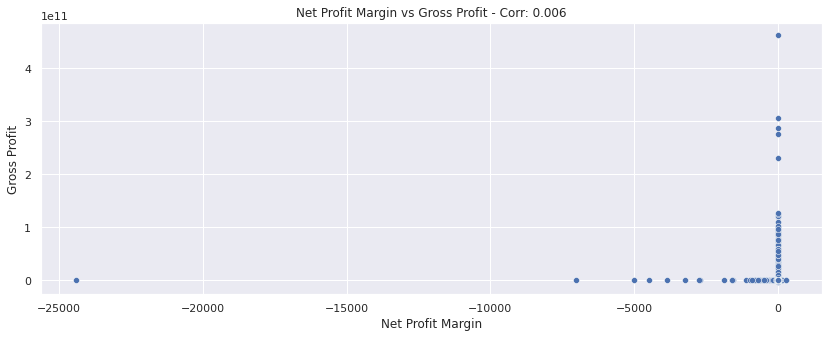

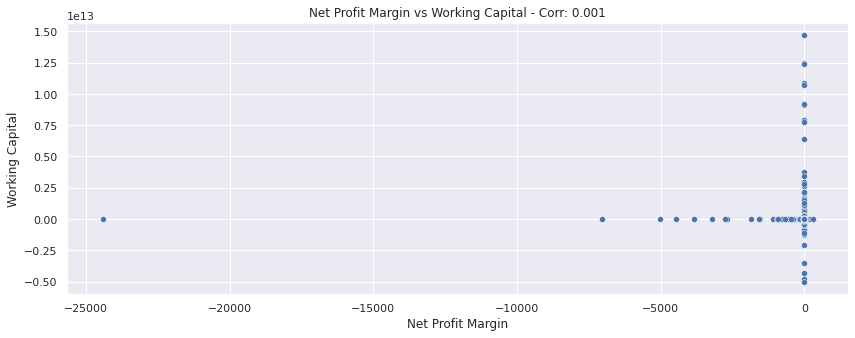

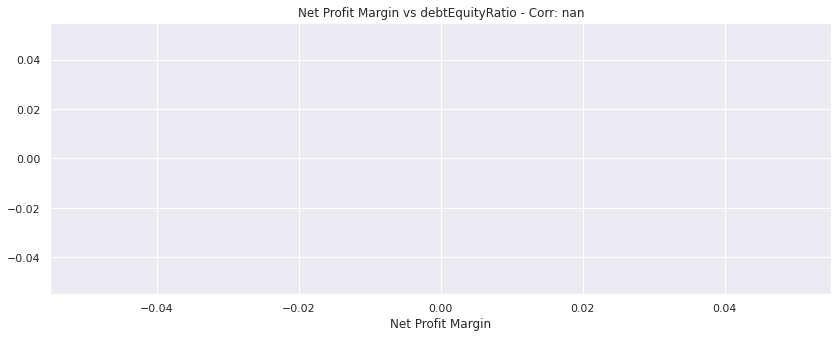

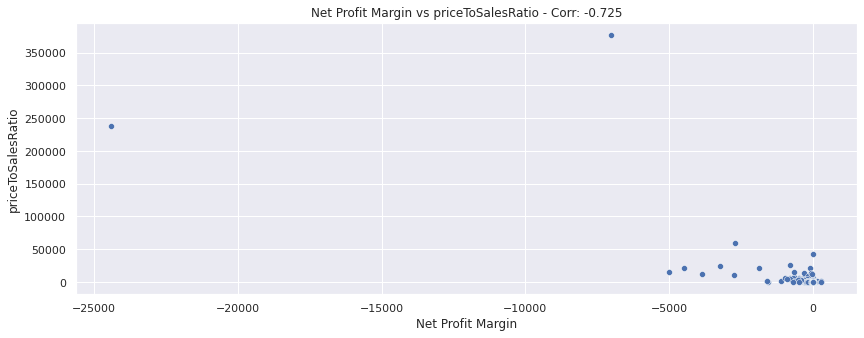

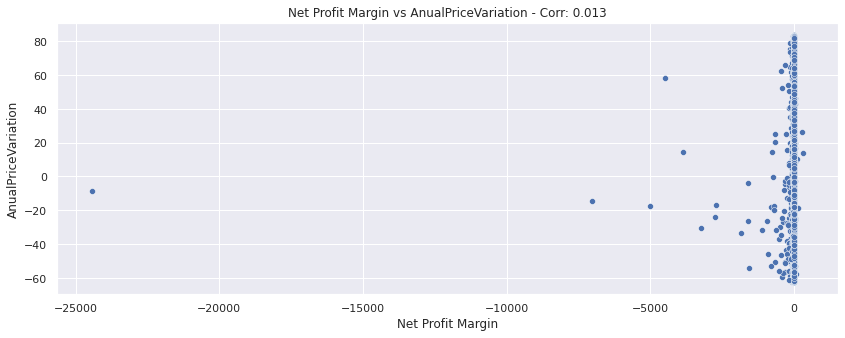

In [ ]:
interesting_indicators=['Revenue Growth','Gross Profit','Current ratio','Working Capital',
                     'quickRatio','debtEquityRatio','Net cash flow / Change in cash','priceToSalesRatio','Net Profit Margin',
                     'AnualPriceVariation']

for i in interesting_indicators:
  for j in interesting_indicators:
    if (i != j):
      fig = plt.figure(figsize=(14,5))
      df_corr = pd.DataFrame(df_financial_ic_woo_av,columns=[i,j])
      seaborn.scatterplot(data=df_corr, x=i, y=j).set(title=f'{i} vs {j} - Corr: {round(df_corr.corr().iloc[0][1],3)}')
      plt.show()
  interesting_indicators.remove(i)#elimino el indicador ya que se correlaciono con todos



###**¿Que podemos observar en las distribuciones y los graficos realizados?**

A travez de las distribuciones y graficos realizados observamos como la mayoria de los indicadores siguen una distribucion normal y como entre los indicadores elegidos no observamos correlacion entre ninguno